In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas_gbq as pg


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pg.read_gbq('SELECT * FROM `baidao-test-666808.sleep_dataset.Sleep_health_and_lifestyle_dataset-2` LIMIT 1000',
                  project_id='baidao-test-666808')

Downloading: 100%|██████████|


In [4]:
#df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

In [5]:
df.head()

Person_ID Gender  Age Occupation  Sleep_Duration  Quality_of_Sleep  \
0         14   Male   29     Doctor             6.0                 6   
1         15   Male   29     Doctor             6.0                 6   
2         16   Male   29     Doctor             6.0                 6   
3         18   Male   29     Doctor             6.0                 6   
4        388   Male   29     Doctor             6.0                 6   

   Physical_Activity_Level  Stress_Level BMI_Category Blood_Pressure  \
0                       30             8       Normal         120/80   
1                       30             8       Normal         120/80   
2                       30             8       Normal         120/80   
3                       30             8       Normal         120/80   
4                       30             8       Normal         120/80   

   Heart_Rate  Daily_Steps Sleep_Disorder  
0          70         8000           None  
1          70         8000           None  
2          70         8000           None  
3          70         8000    Sleep Apnea  
4          70         8000           None

In [6]:
df.tail()

Person_ID Gender  Age Occupation  Sleep_Duration  Quality_of_Sleep  \
995        534   Male   39     Lawyer             7.2                 8   
996        535   Male   39     Lawyer             7.2                 8   
997        895   Male   39     Lawyer             7.2                 8   
998        900   Male   39     Lawyer             7.2                 8   
999        901   Male   39     Lawyer             7.2                 8   

     Physical_Activity_Level  Stress_Level BMI_Category Blood_Pressure  \
995                       60             5       Normal         130/85   
996                       60             5       Normal         130/85   
997                       60             5       Normal         130/85   
998                       60             5       Normal         130/85   
999                       60             5       Normal         130/85   

     Heart_Rate  Daily_Steps Sleep_Disorder  
995          68         8000           None  
996          68         8000           None  
997          68         8000       Insomnia  
998          68         8000           None  
999          68         8000           None

In [7]:
df.shape

(1000, 13)

In [8]:
df.columns

Index(['Person_ID', 'Gender', 'Age', 'Occupation', 'Sleep_Duration',
       'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level',
       'BMI_Category', 'Blood_Pressure', 'Heart_Rate', 'Daily_Steps',
       'Sleep_Disorder'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Person_ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Blood_Pressure             0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                1000 non-null   Int64  
 1   Gender                   1000 non-null   object 
 2   Age                      1000 non-null   Int64  
 3   Occupation               1000 non-null   object 
 4   Sleep_Duration           1000 non-null   float64
 5   Quality_of_Sleep         1000 non-null   Int64  
 6   Physical_Activity_Level  1000 non-null   Int64  
 7   Stress_Level             1000 non-null   Int64  
 8   BMI_Category             1000 non-null   object 
 9   Blood_Pressure           1000 non-null   object 
 10  Heart_Rate               1000 non-null   Int64  
 11  Daily_Steps              1000 non-null   Int64  
 12  Sleep_Disorder           1000 non-null   object 
dtypes: Int64(7), float64(1), object(5)
memory usage: 108.5+ KB


In [12]:
df.describe()

Person_ID       Age  Sleep_Duration  Quality_of_Sleep  \
count      1000.0    1000.0     1000.000000            1000.0   
mean       559.03    42.228        7.037400             7.229   
std    323.234208  8.578672        0.780558          1.206654   
min           1.0      27.0        5.800000               4.0   
25%        274.75      36.0        6.300000               6.0   
50%         557.5      43.0        7.100000               7.0   
75%        840.25      49.0        7.800000               8.0   
max        1122.0      59.0        8.500000               9.0   

       Physical_Activity_Level  Stress_Level  Heart_Rate  Daily_Steps  
count                   1000.0        1000.0      1000.0       1000.0  
mean                      58.8         5.474      70.412       6798.5  
std                  20.274394      1.805154    4.235114   1637.33583  
min                       30.0           3.0        65.0       3000.0  
25%                       45.0           4.0        68.0       6000.0  
50%                       60.0           5.0        70.0       7000.0  
75%                       75.0           7.0        72.0       8000.0  
max                       90.0           8.0        86.0      10000.0

In [13]:
df.nunique()

Person_ID                  1000
Gender                        2
Age                          31
Occupation                   11
Sleep_Duration               25
Quality_of_Sleep              6
Physical_Activity_Level      16
Stress_Level                  6
BMI_Category                  4
Blood_Pressure               25
Heart_Rate                   19
Daily_Steps                  20
Sleep_Disorder                3
dtype: int64

In [14]:
df.drop('Person_ID', axis = 1, inplace = True)

In [15]:
# Check numerical data types
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Numerical Columns:")
print()
for column in numerical_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

    # Check object data types
object_columns = df.select_dtypes(include=['object']).columns
print("\nObject Columns:")
print()
for column in object_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Numerical Columns:

Age: <IntegerArray>
[29, 32, 33, 49, 50, 51, 42, 43, 44, 52, 39, 45, 35, 37, 58, 59, 53, 54, 34,
 41, 38, 48, 30, 31, 55, 57, 27, 36, 56, 28, 40]
Length: 31, dtype: Int64
Sleep_Duration: [6.  6.5 7.5 8.  8.5 5.8 6.3 6.8 7.3 7.8 8.1 6.1 6.6 7.1 7.6 8.2 5.9 6.4
 6.9 7.4 7.9 8.3 6.2 6.7 7.2]
Quality_of_Sleep: <IntegerArray>
[6, 7, 5, 8, 9, 4]
Length: 6, dtype: Int64
Physical_Activity_Level: <IntegerArray>
[30, 90, 45, 40, 60, 80, 75, 32, 70, 65, 85, 42, 35, 55, 47, 50]
Length: 16, dtype: Int64
Stress_Level: <IntegerArray>
[8, 7, 4, 3, 5, 6]
Length: 6, dtype: Int64
Heart_Rate: <IntegerArray>
[70, 72, 75, 80, 65, 67, 68, 81, 82, 78, 83, 86, 77, 74, 85, 69, 84, 76, 73]
Length: 19, dtype: Int64
Daily_Steps: <IntegerArray>
[ 8000,  5000, 10000,  6000,  4000,  7500,  7000,  5200,  3500,  6200,  3700,
  4200,  4800,  6800,  3000,  4100,  5500,  3300,  5600,  7300]
Length: 20, dtype: Int64

Object Columns:

Gender: ['Male' 'Female']
Occupation: ['Doctor' 'Nurse' 'Salesperson' 

In [16]:
df['Sleep_Disorder'] = df['Sleep_Disorder'].fillna('None')

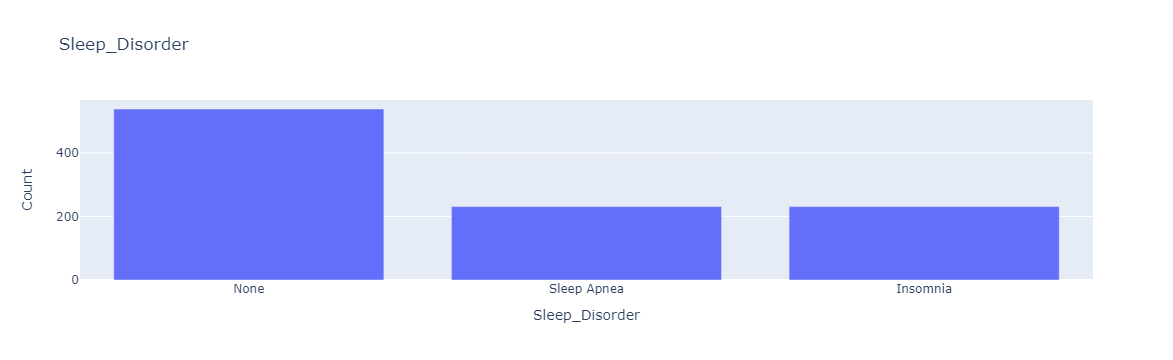

In [17]:
fig = go.Figure(data=[go.Bar(x=df['Sleep_Disorder'].value_counts().index,
                             y=df['Sleep_Disorder'].value_counts())])
fig.update_layout(
 title= 'Sleep_Disorder',
 xaxis_title="Sleep_Disorder",
 yaxis_title="Count"
 )
fig.show()

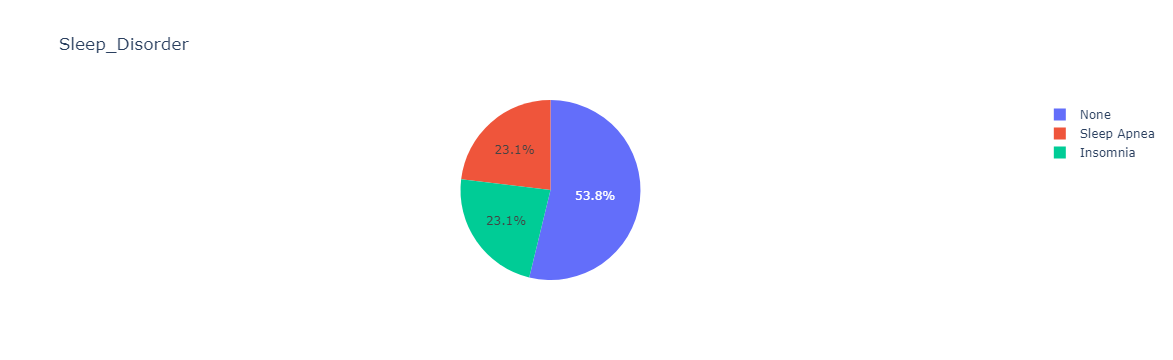

In [18]:
fig = go.Figure(data=[go.Pie(labels=df['Sleep_Disorder'].value_counts().index,
                             values=df['Sleep_Disorder'].value_counts())])
fig.update_layout(title= 'Sleep_Disorder')
fig.show()

In [19]:
df['Gender'].value_counts()

Gender
Female    513
Male      487
Name: count, dtype: int64

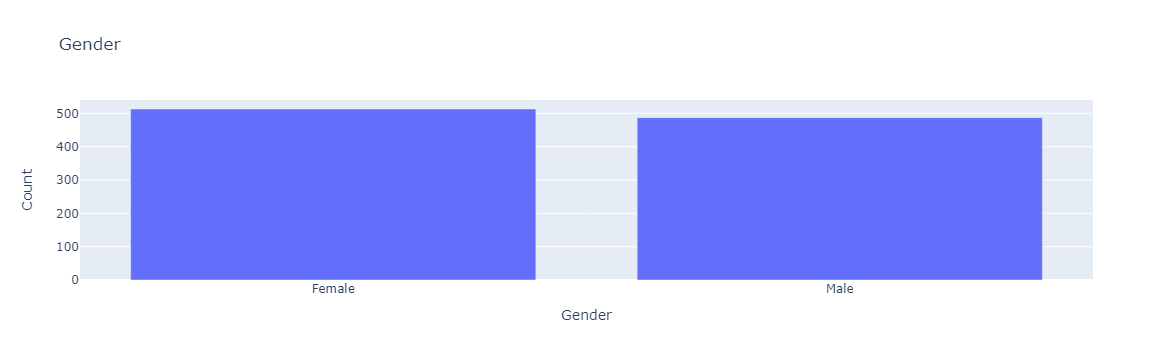

In [20]:
fig = go.Figure(data = [go.Bar(x = df['Gender'].value_counts().index,
                              y = df['Gender'].value_counts())])
fig.update_layout(
    title = 'Gender',
    xaxis_title = 'Gender',
    yaxis_title = 'Count'
)
fig.show()

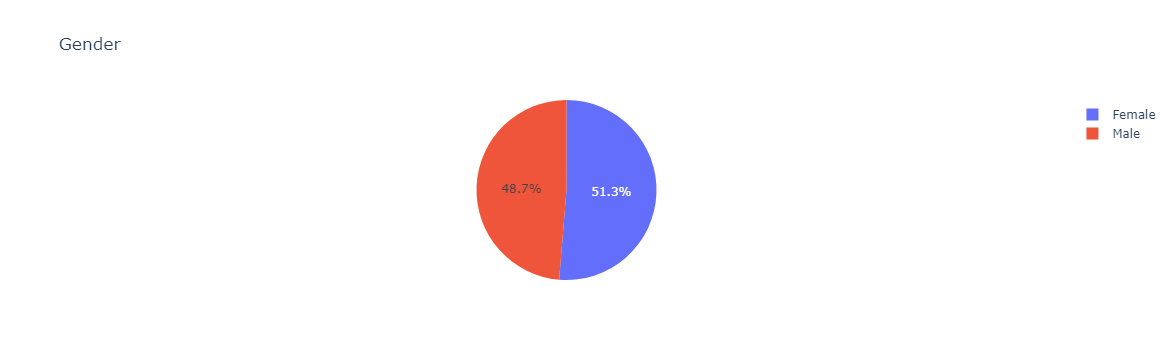

In [21]:
counts = df['Gender'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Gender')
fig.show()

In [22]:
df['Occupation'].value_counts()

Occupation
Nurse                   219
Doctor                  171
Engineer                132
Teacher                 120
Lawyer                  118
Accountant              111
Salesperson              96
Software Engineer        12
Scientist                12
Sales Representative      6
Manager                   3
Name: count, dtype: int64

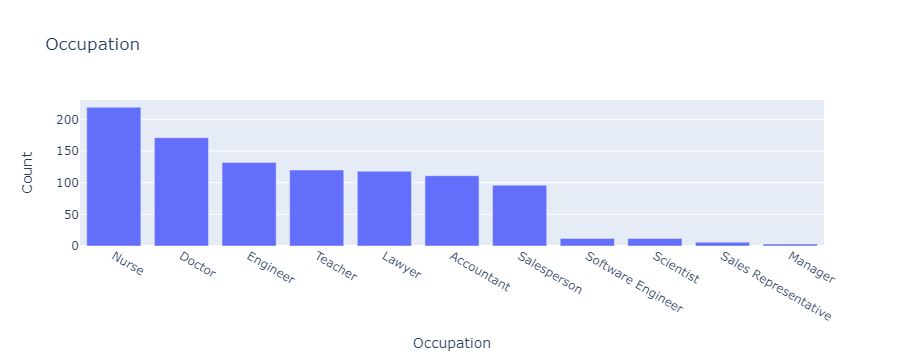

In [23]:
fig = go.Figure(data=[go.Bar(x=df['Occupation'].value_counts().index, y=df['Occupation'].value_counts())])
fig.update_layout(
 title= 'Occupation',
 xaxis_title="Occupation",
 yaxis_title="Count"
 )
fig.show()

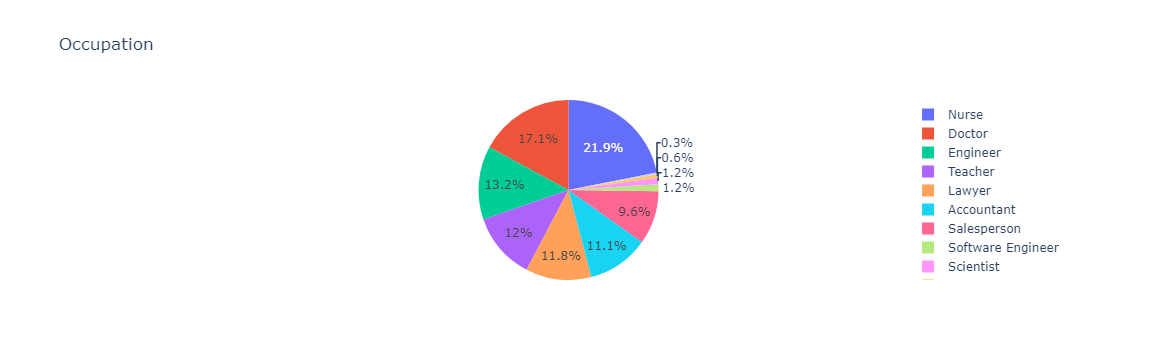

In [24]:
counts = df['Occupation'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Occupation')
fig.show()

In [25]:
df['BMI_Category'].value_counts()

BMI_Category
Normal           463
Overweight       444
Normal Weight     63
Obese             30
Name: count, dtype: int64

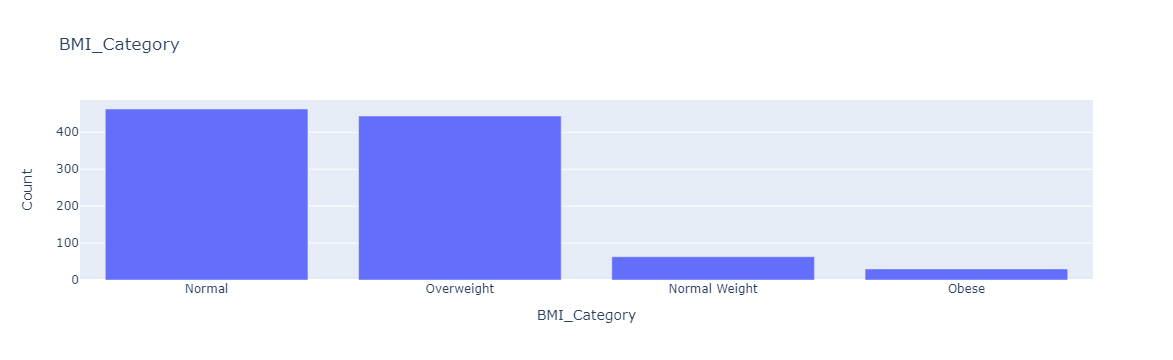

In [26]:
fig = go.Figure(data=[go.Bar(x=df['BMI_Category'].value_counts().index, y=df['BMI_Category'].value_counts())])
fig.update_layout(
 title= 'BMI_Category',
 xaxis_title="BMI_Category",
 yaxis_title="Count"
 )
fig.show()

**Stress_Level by Gender**

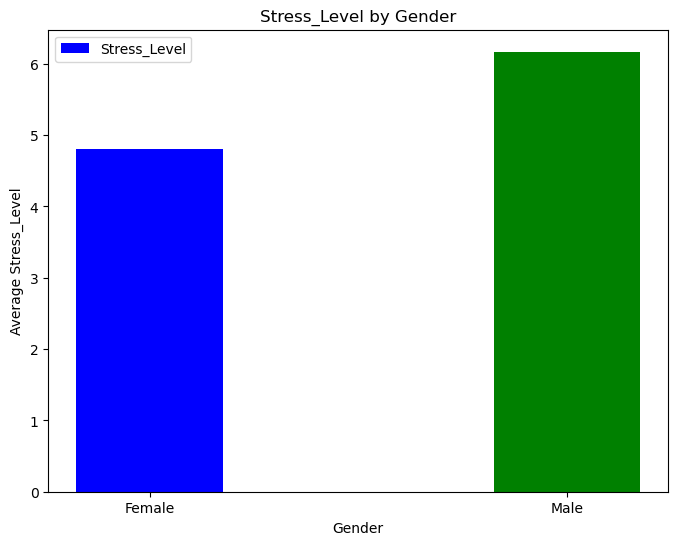

In [27]:
gender_stress = df.groupby('Gender')['Stress_Level'].mean()
x = np.arange(len(gender_stress))
width = 0.35
plt.figure(figsize=(8, 6))
plt.bar(x, gender_stress, width, label='Stress_Level', color=['blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Average Stress_Level')
plt.title('Stress_Level by Gender')
plt.xticks(x, gender_stress.index)
plt.legend()
plt.show()

**Occupation vs Daily_Steps taken**

In [28]:
df = pg.read_gbq('SELECT * FROM `baidao-test-666808.sleep_dataset.Sleep_health_and_lifestyle_dataset-2` LIMIT 1000',
                  project_id='baidao-test-666808')

Downloading: 100%|██████████|


In [29]:
df.head() 

Person_ID Gender  Age Occupation  Sleep_Duration  Quality_of_Sleep  \
0         14   Male   29     Doctor             6.0                 6   
1         15   Male   29     Doctor             6.0                 6   
2         16   Male   29     Doctor             6.0                 6   
3         18   Male   29     Doctor             6.0                 6   
4        388   Male   29     Doctor             6.0                 6   

   Physical_Activity_Level  Stress_Level BMI_Category Blood_Pressure  \
0                       30             8       Normal         120/80   
1                       30             8       Normal         120/80   
2                       30             8       Normal         120/80   
3                       30             8       Normal         120/80   
4                       30             8       Normal         120/80   

   Heart_Rate  Daily_Steps Sleep_Disorder  
0          70         8000           None  
1          70         8000           None  
2          70         8000           None  
3          70         8000    Sleep Apnea  
4          70         8000           None

In [30]:
#df = df.drop('Person_ID', axis = 1)

**Visualize Blood_Pressure trends by age**

**BMI_Category Distribution**

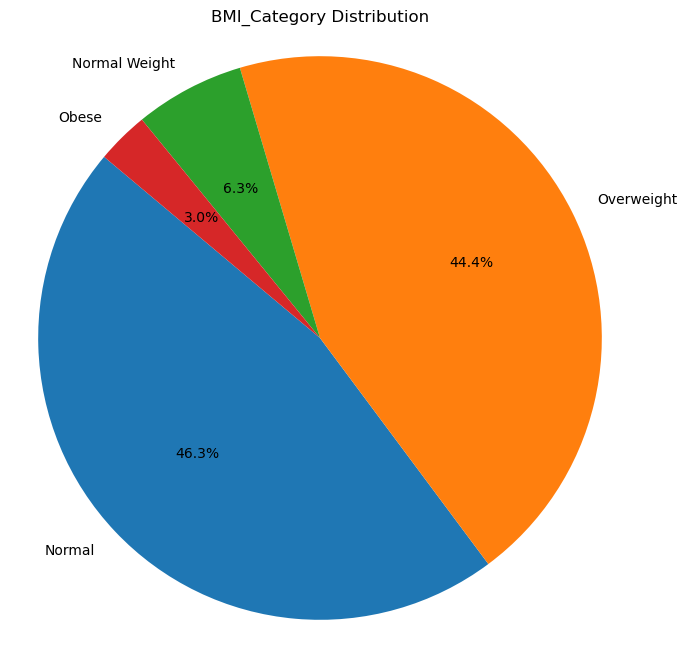

In [31]:
bmi_counts = df['BMI_Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("BMI_Category Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [32]:
df[['Systolic', 'Diastolic']] = df['Blood_Pressure'].str.split('/', expand=True).astype(int)

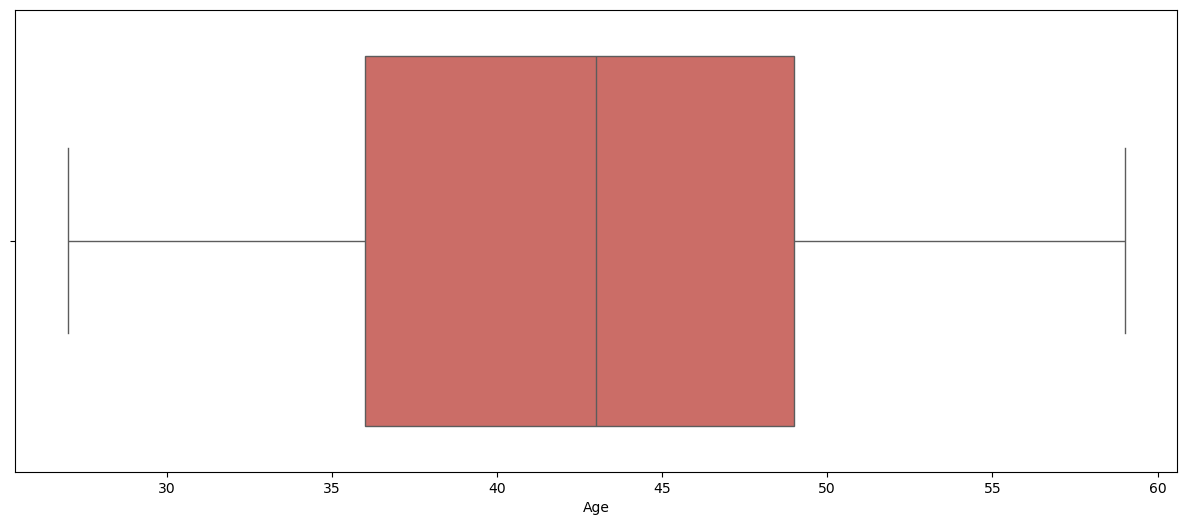

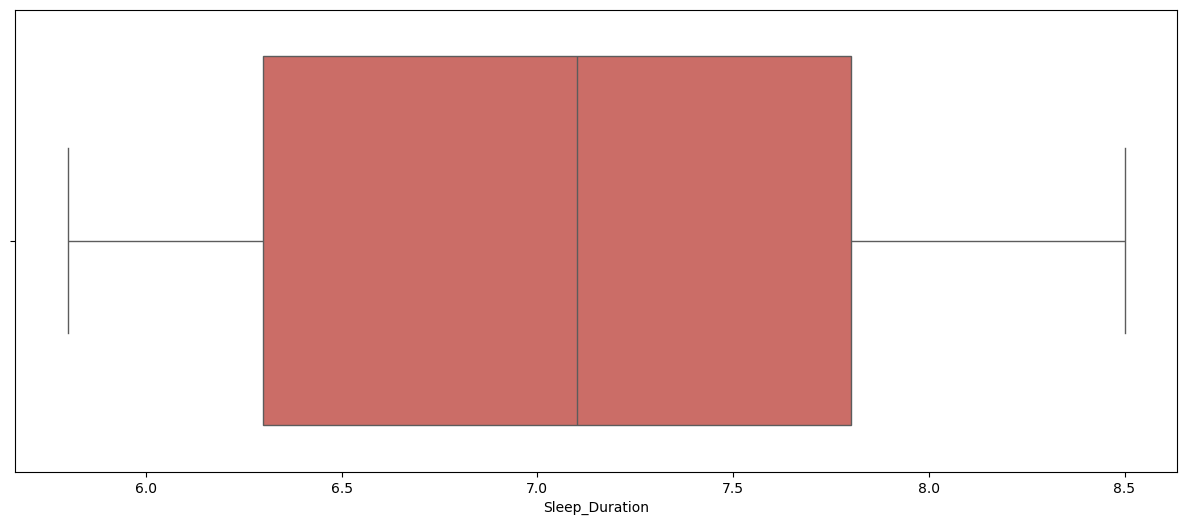

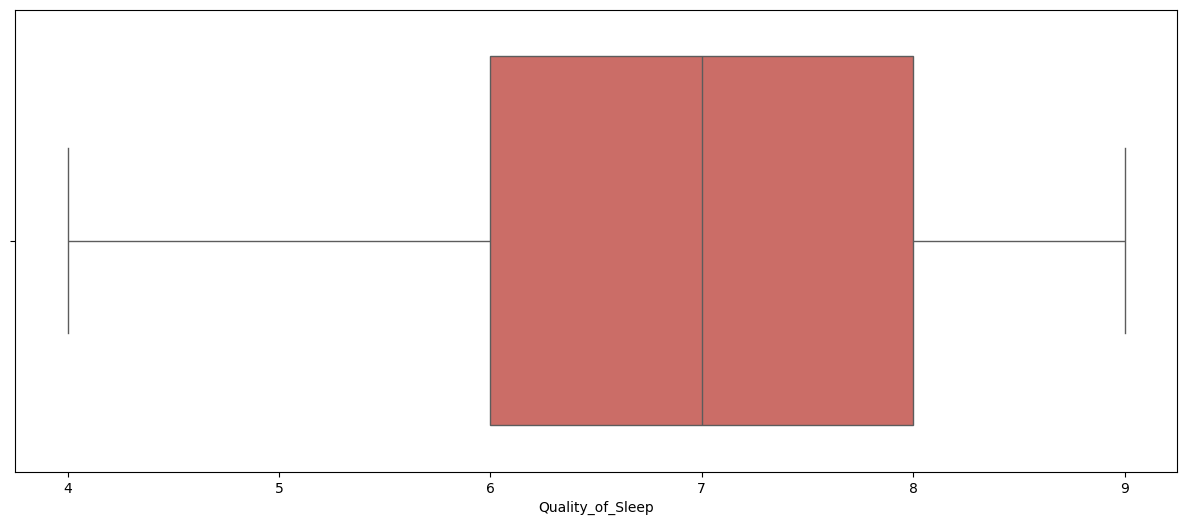

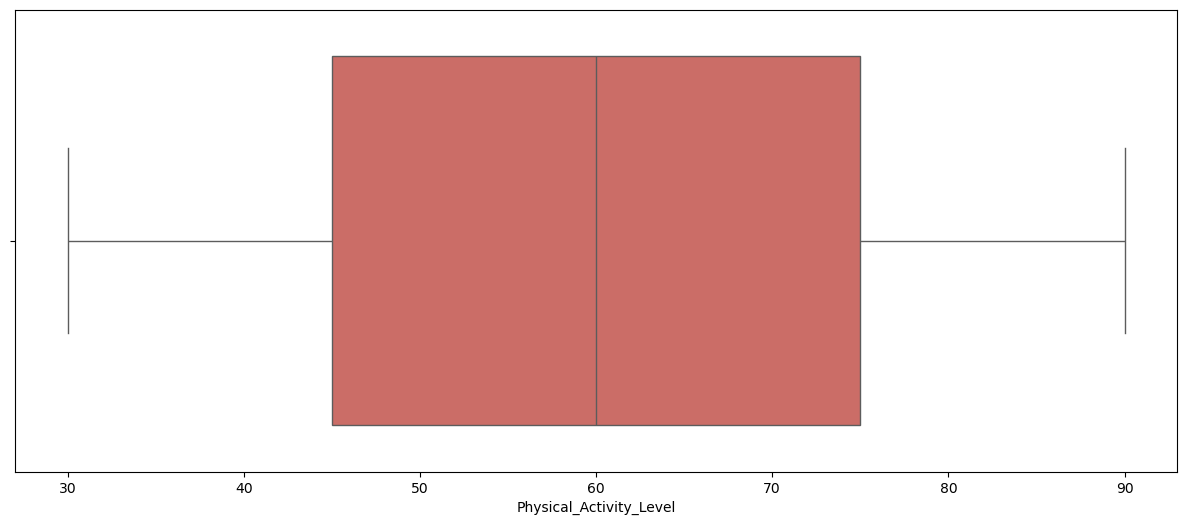

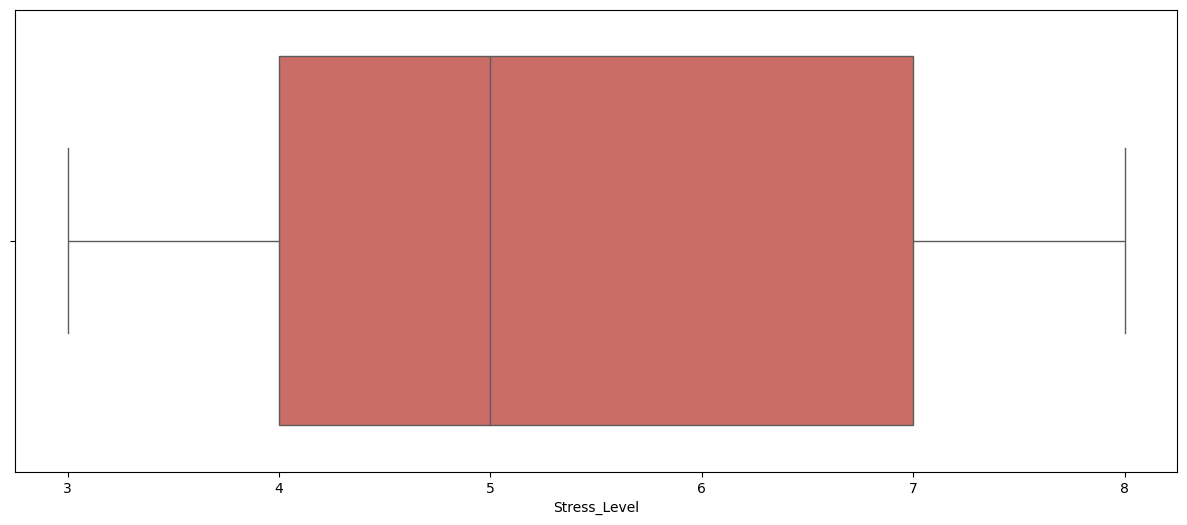

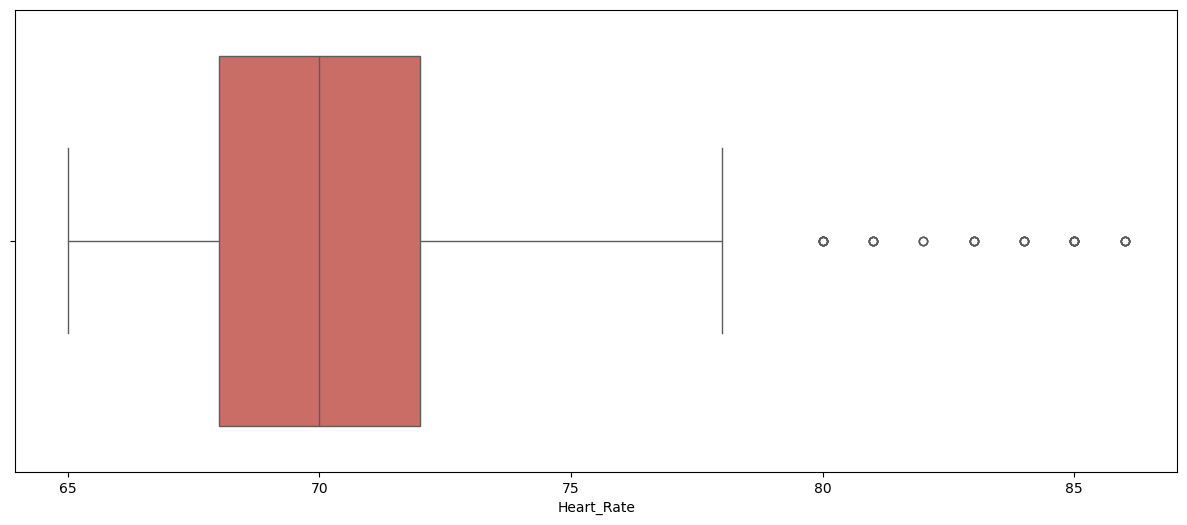

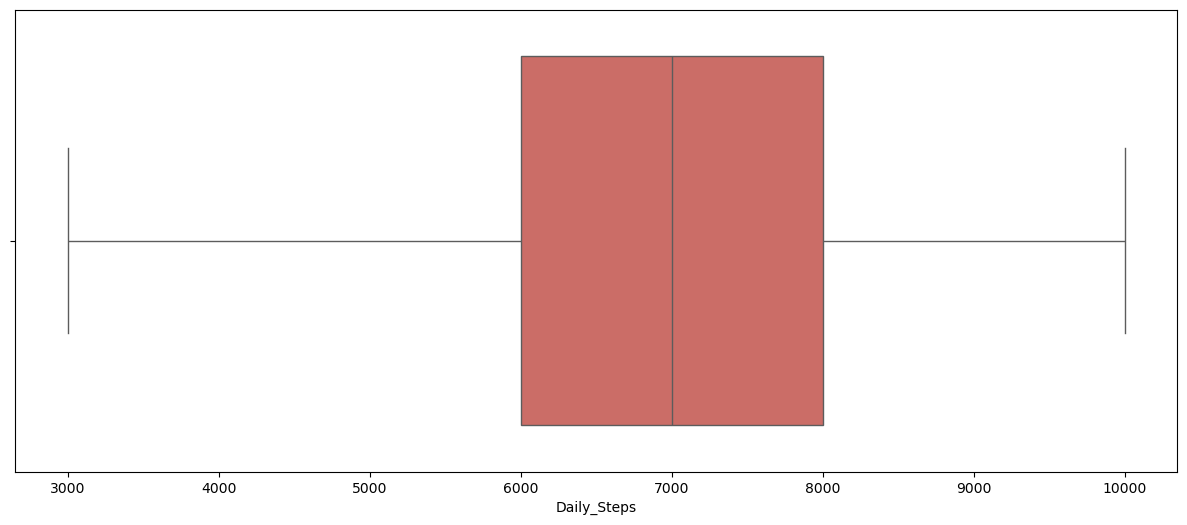

In [33]:
for i in numerical_columns:
    if i != 'Person_ID':
        plt.figure(figsize=(15,6))
        sns.boxplot(x = i, data = df, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()

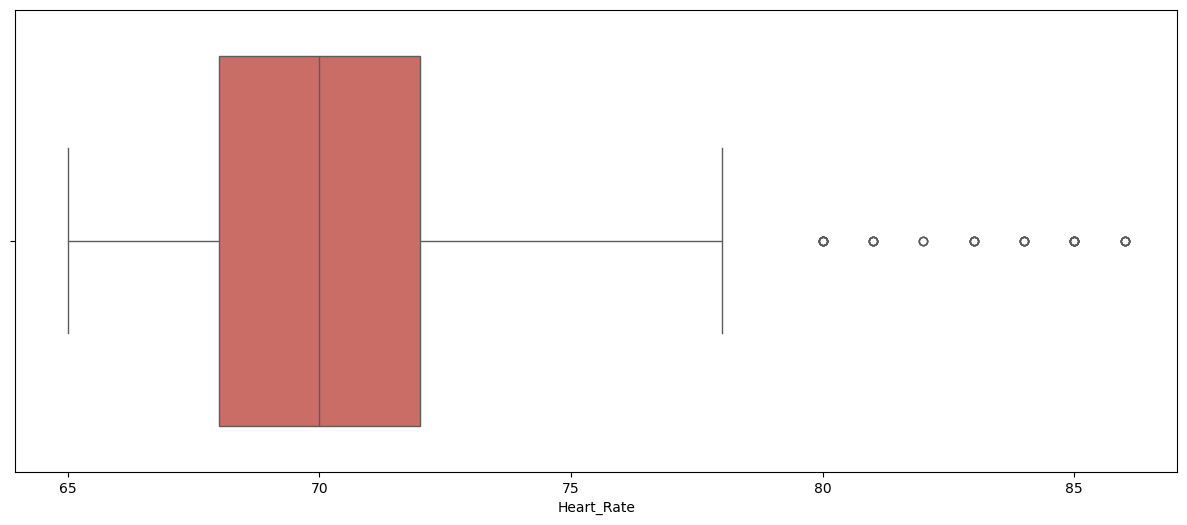

In [34]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Heart_Rate', data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

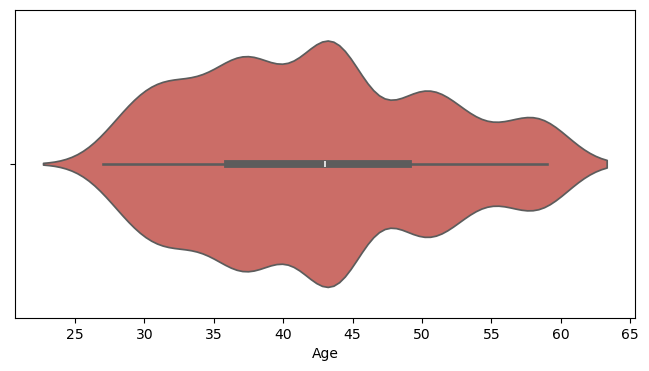

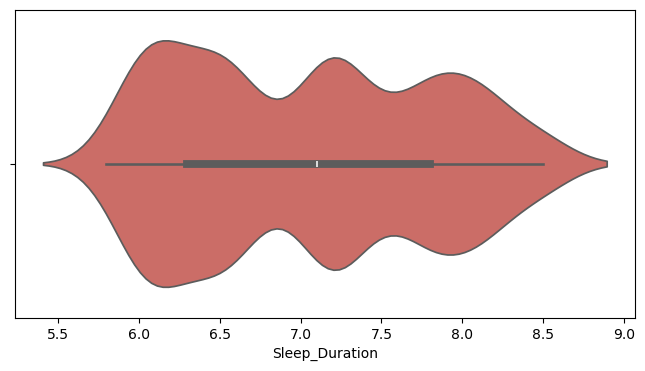

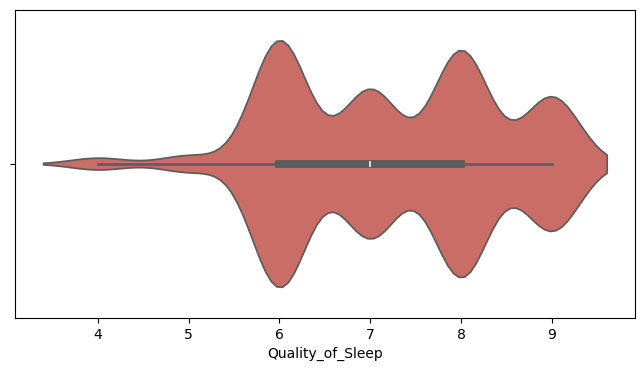

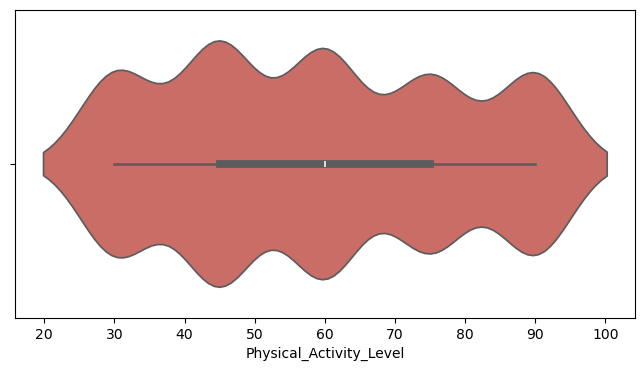

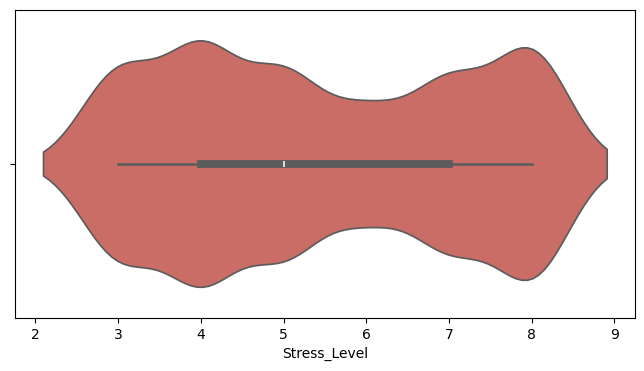

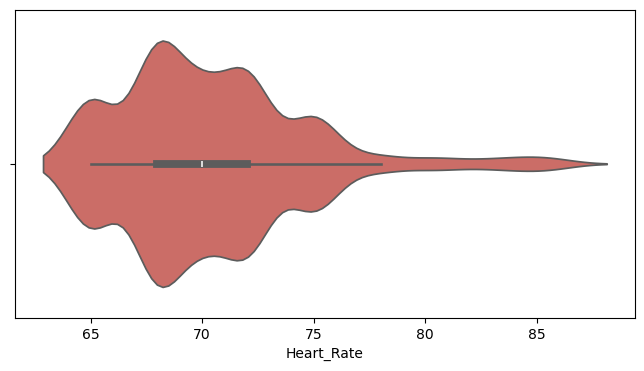

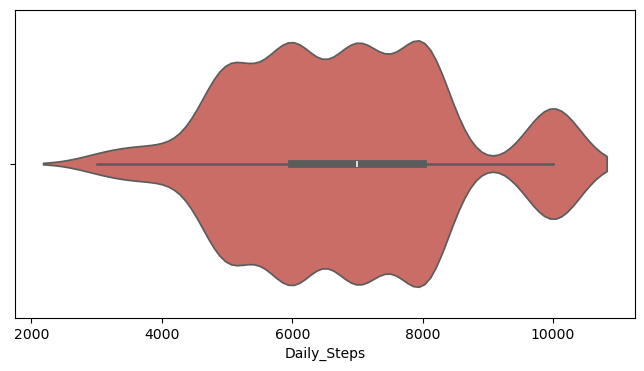

In [35]:
for i in numerical_columns:
    if i != 'Person_ID':
        plt.figure(figsize=(8,4))
        sns.violinplot(x = i, data = df, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()

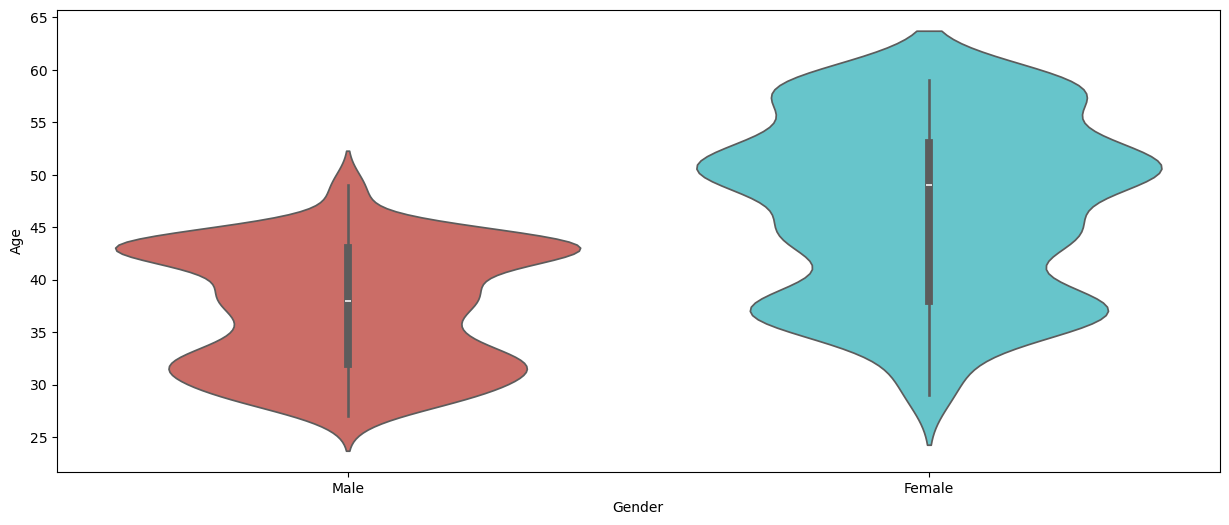

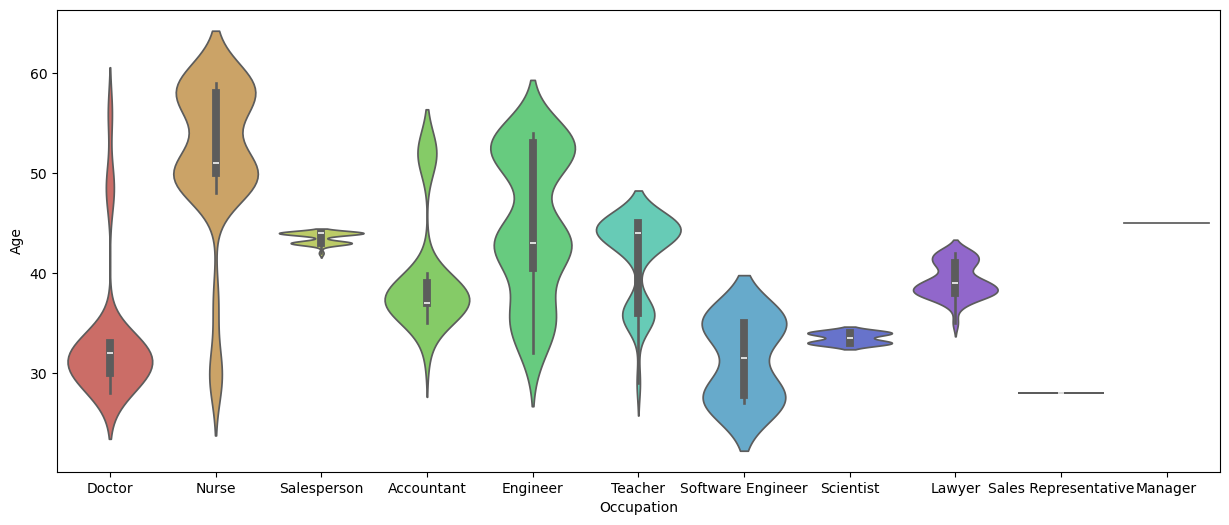

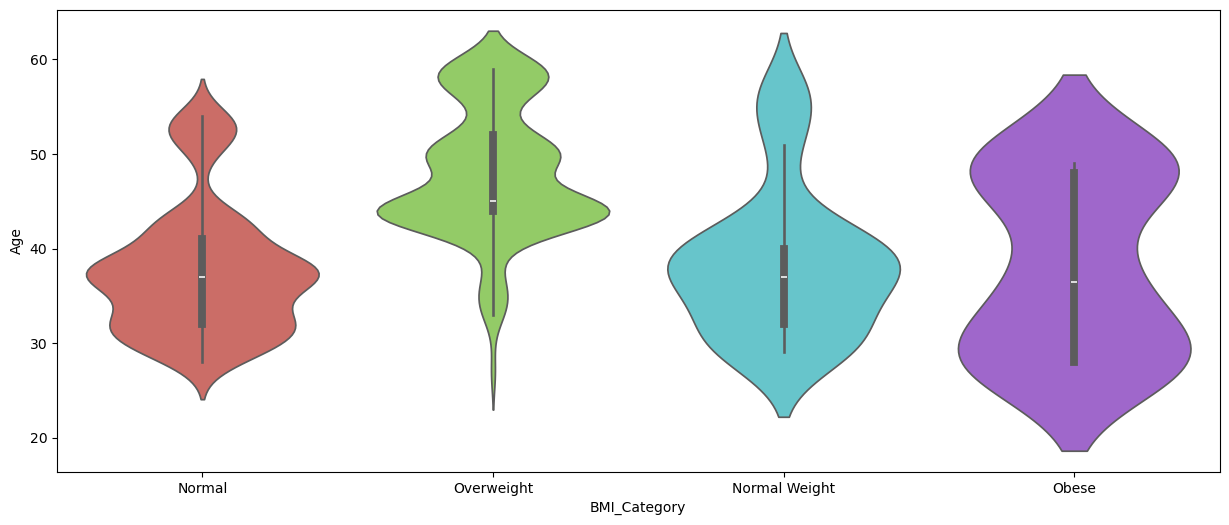

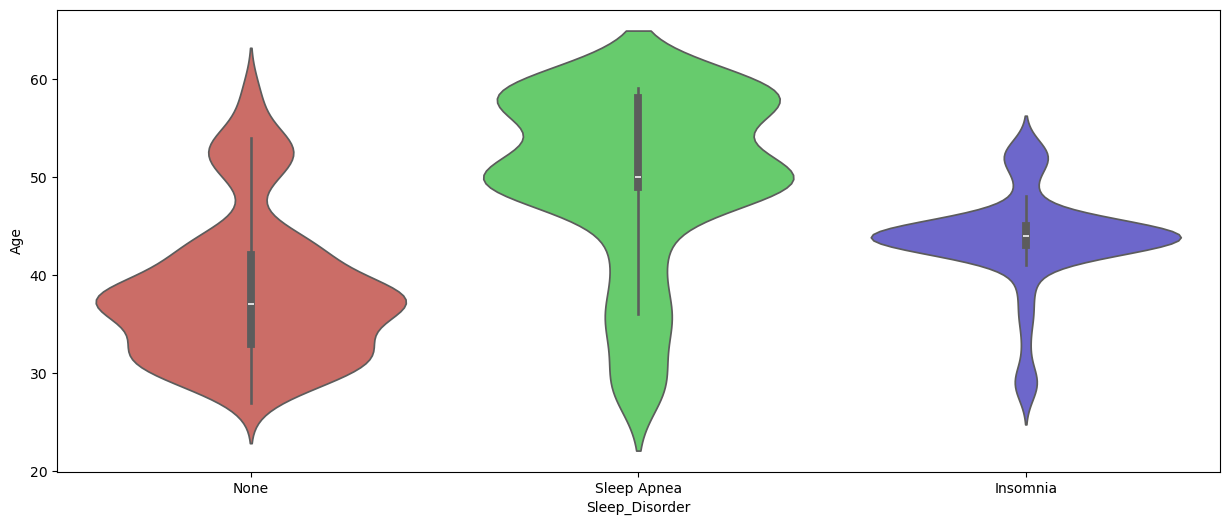

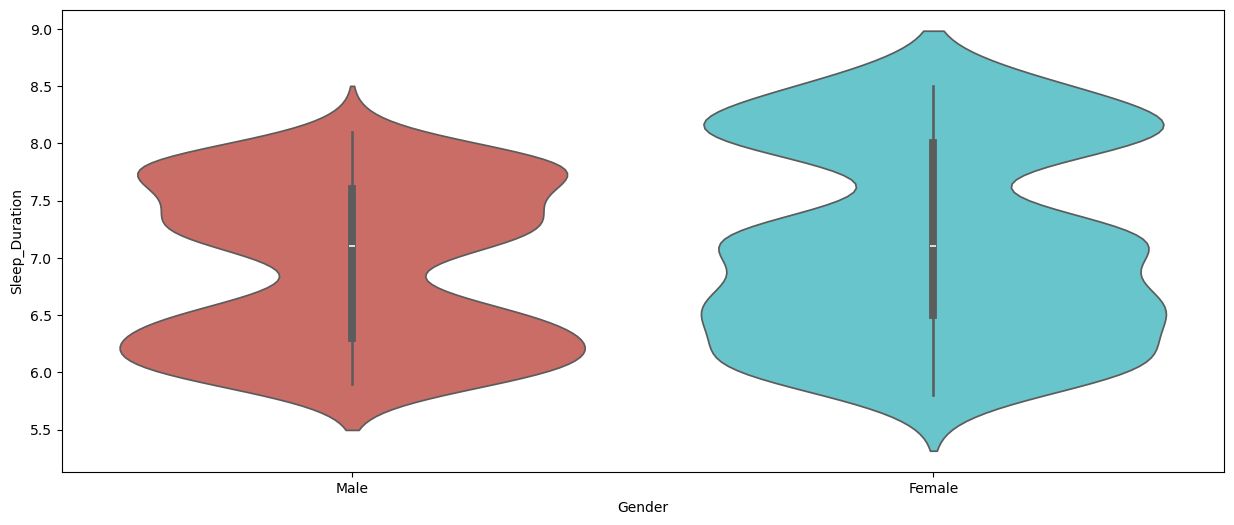

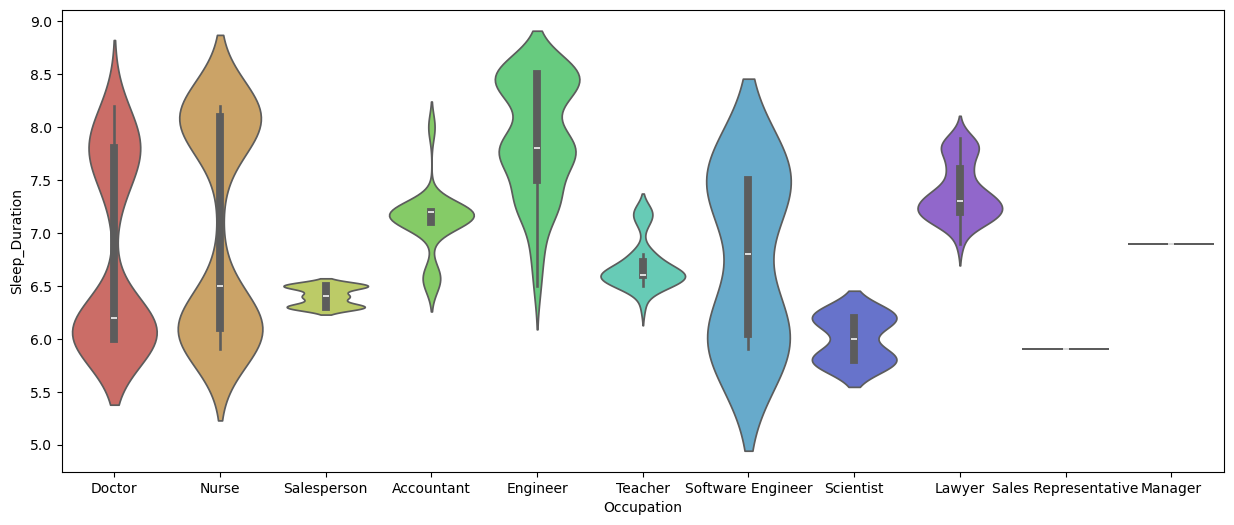

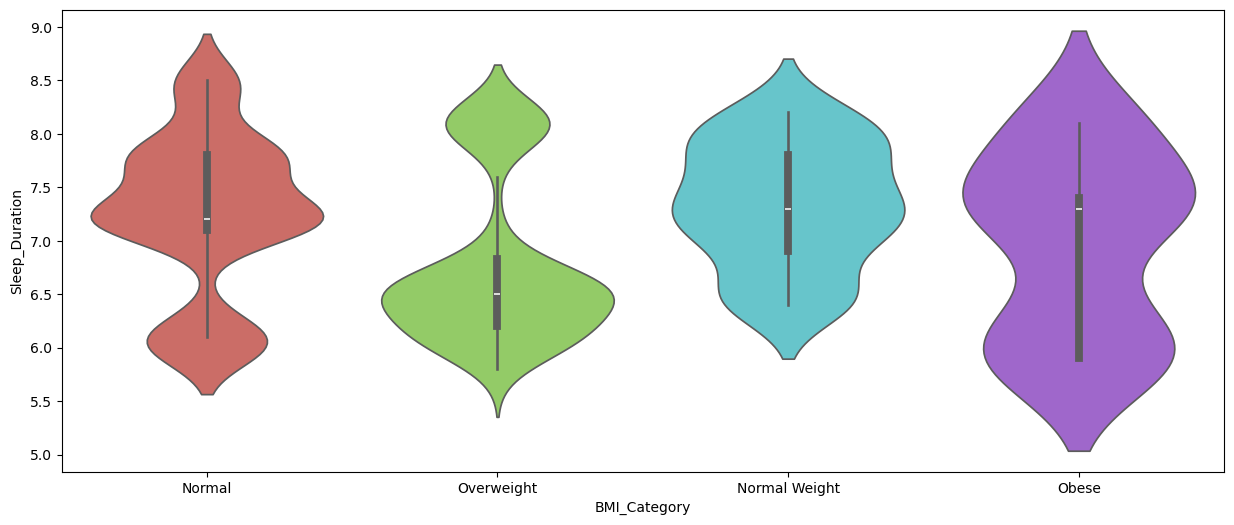

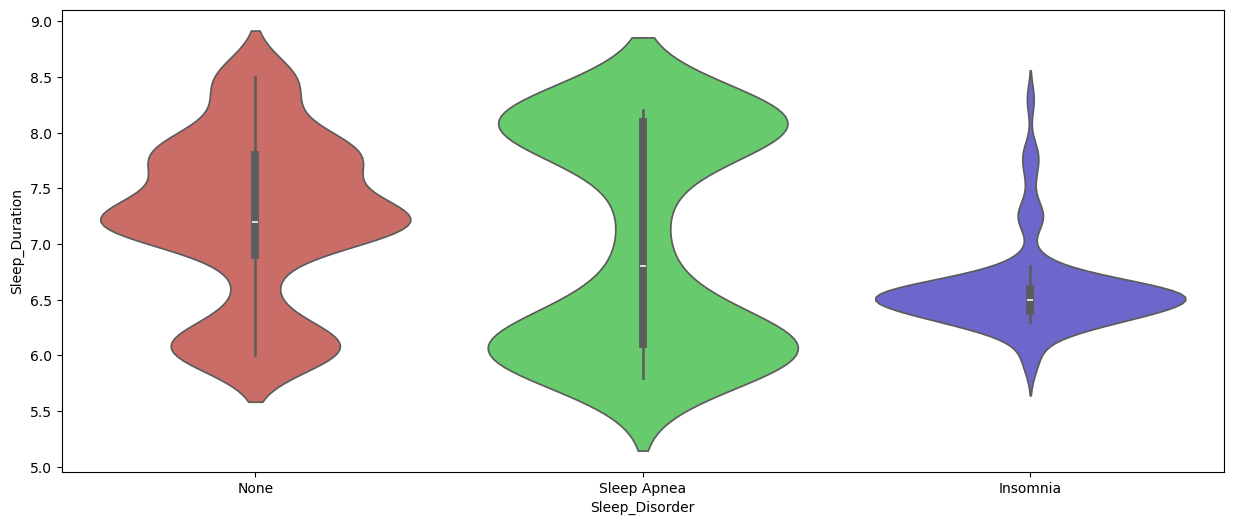

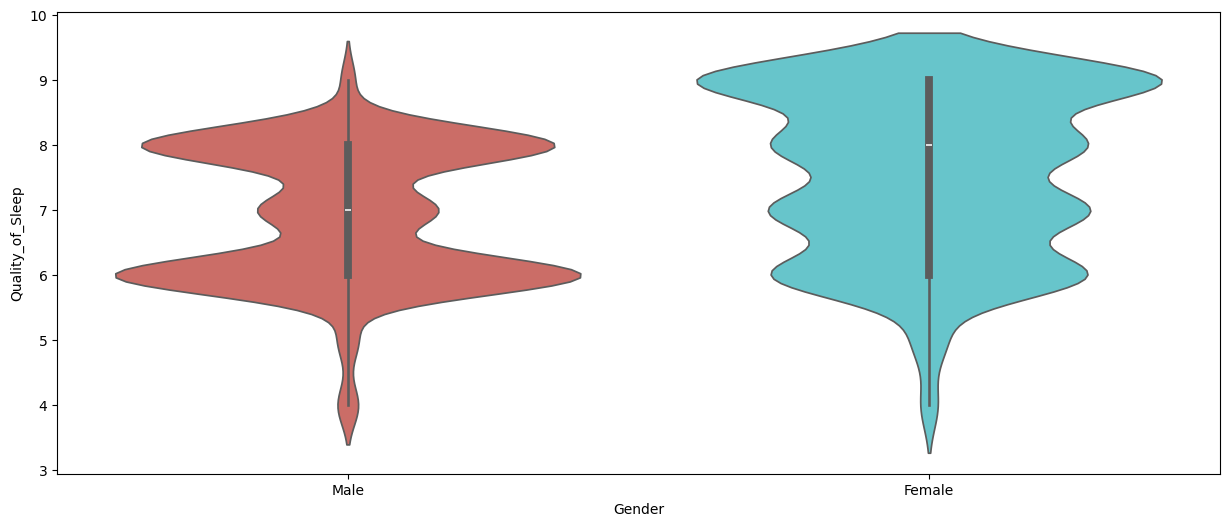

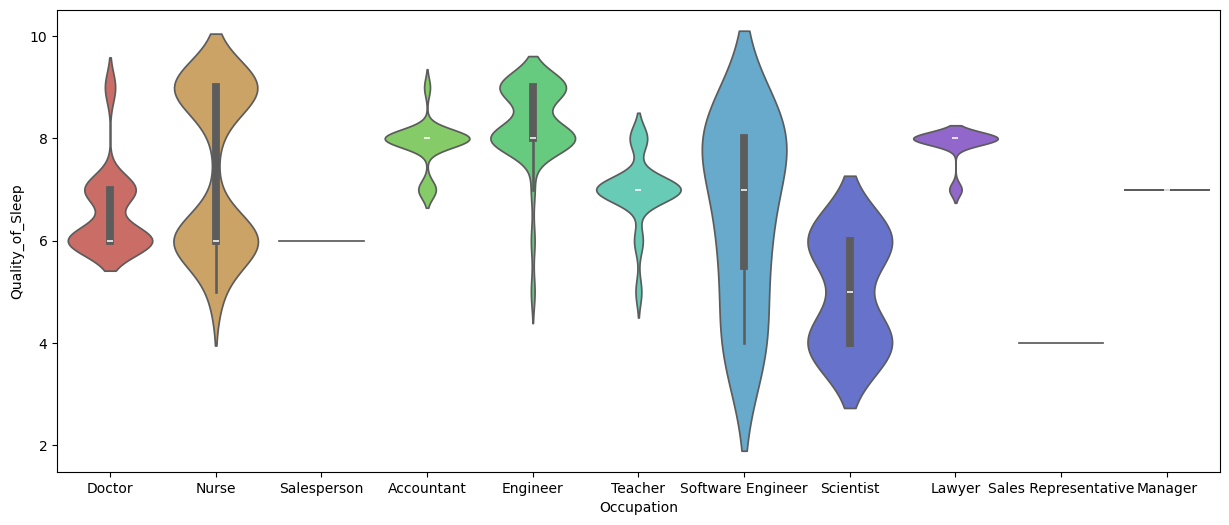

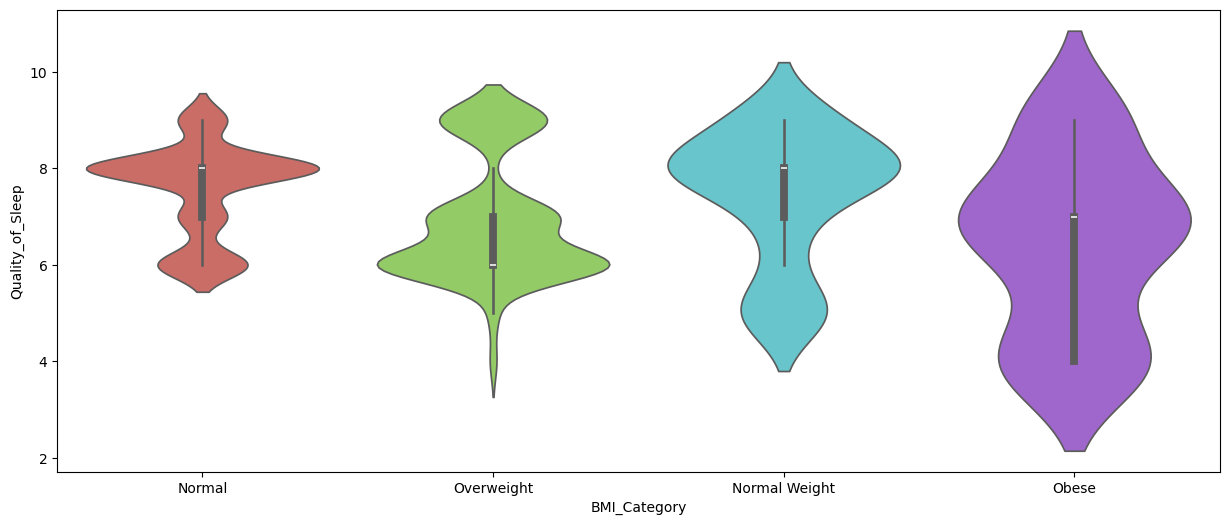

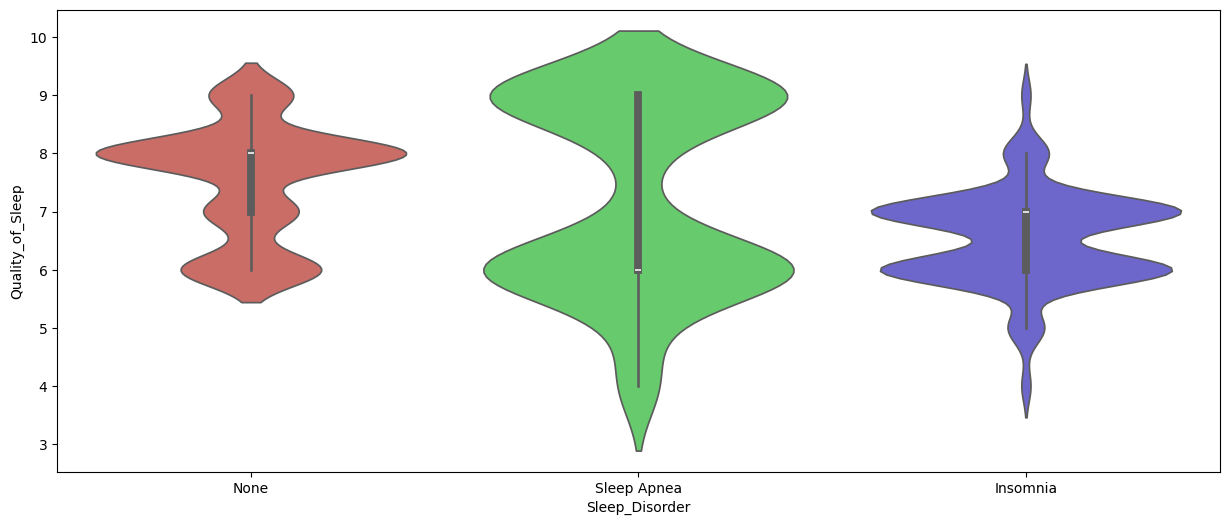

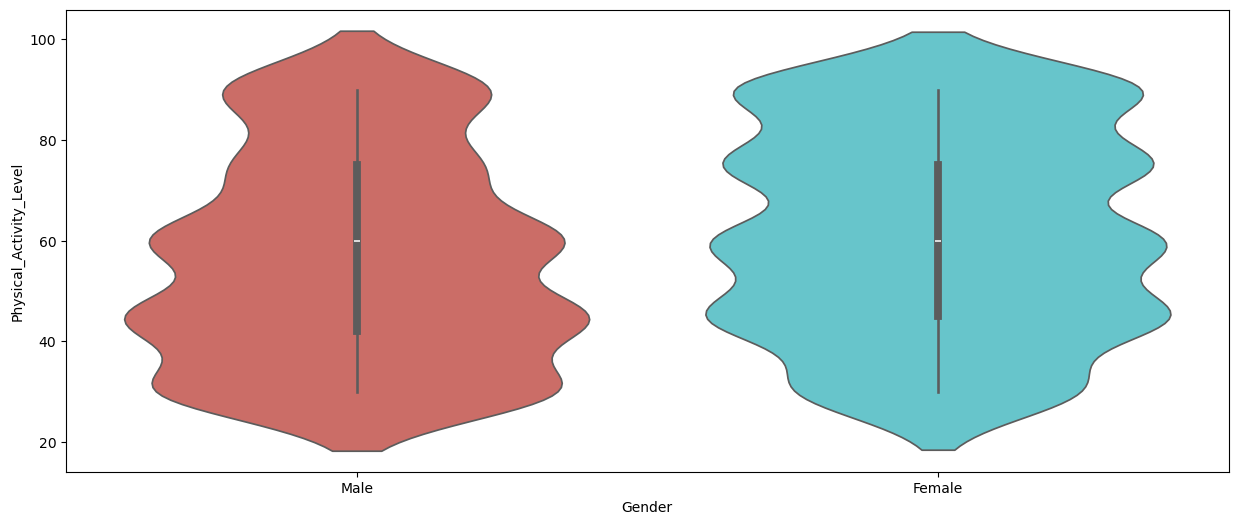

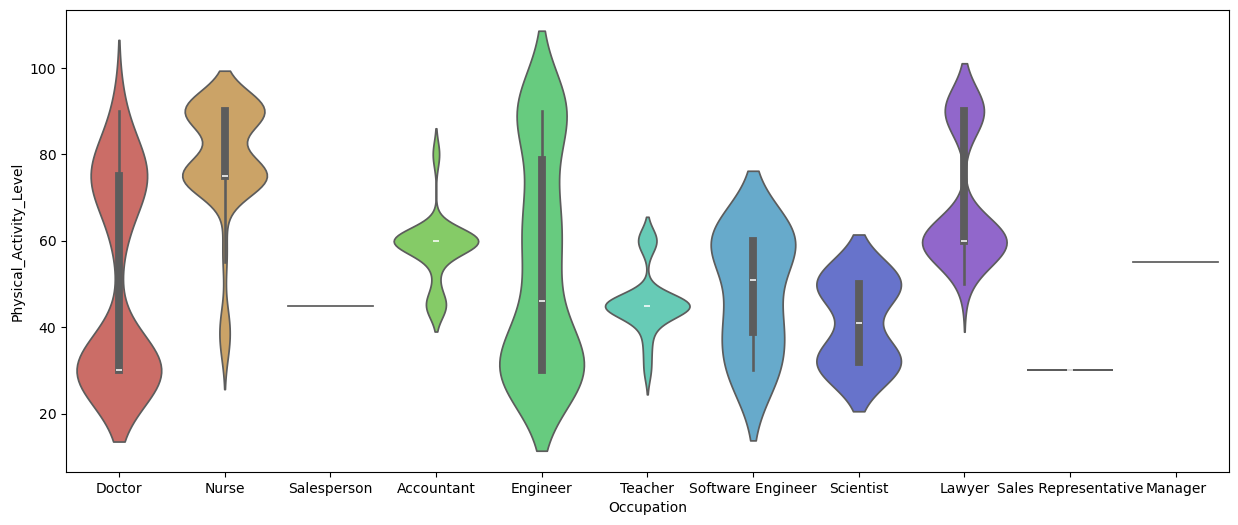

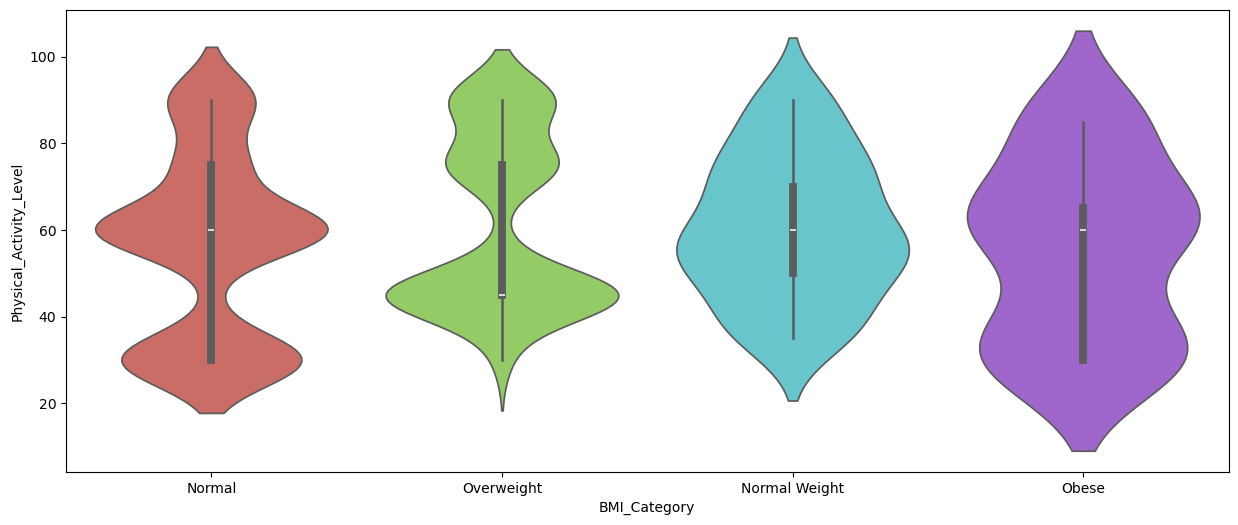

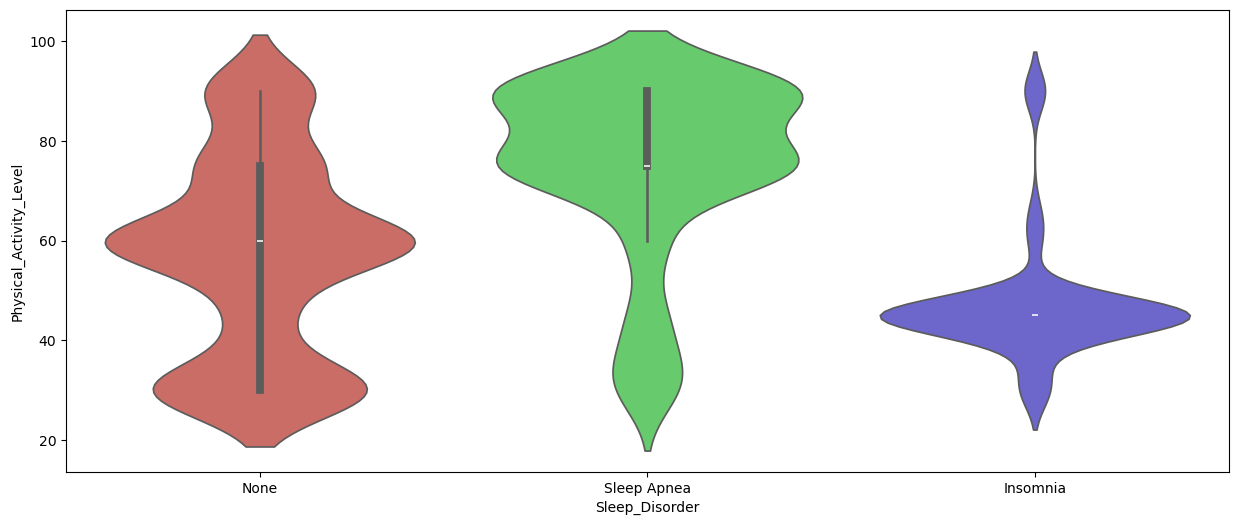

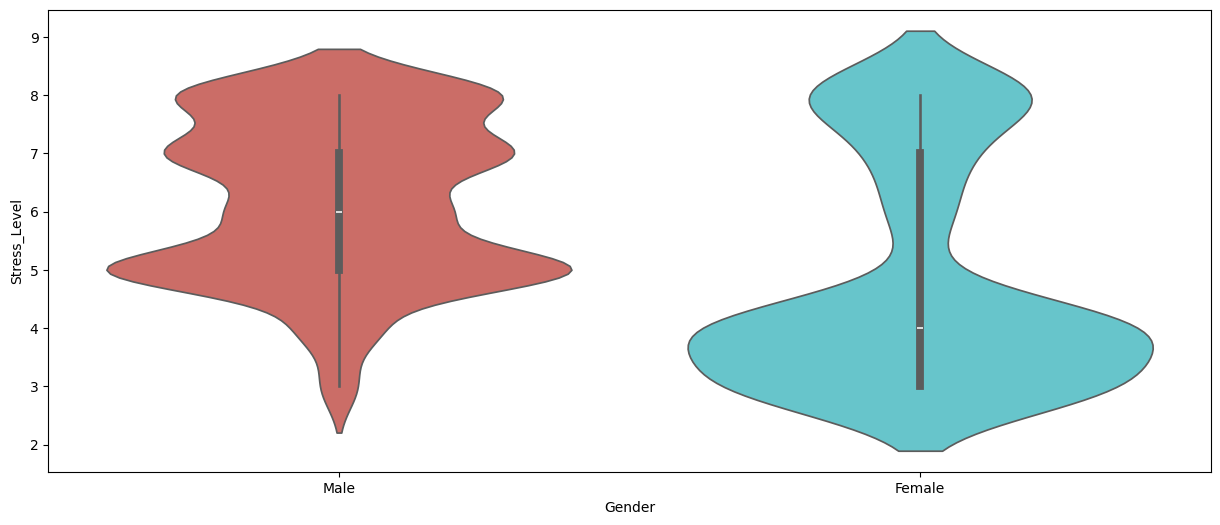

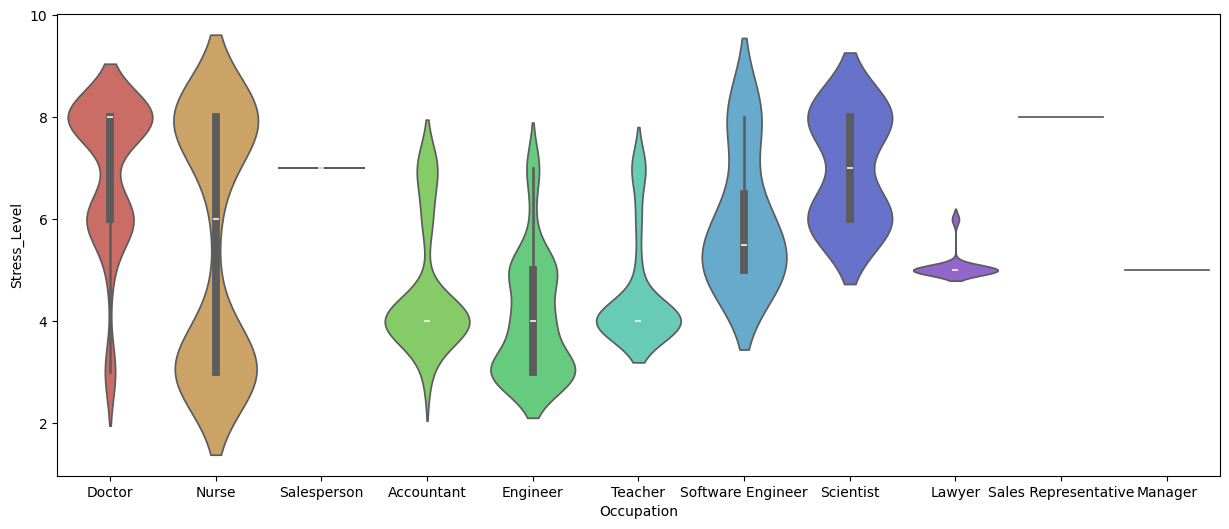

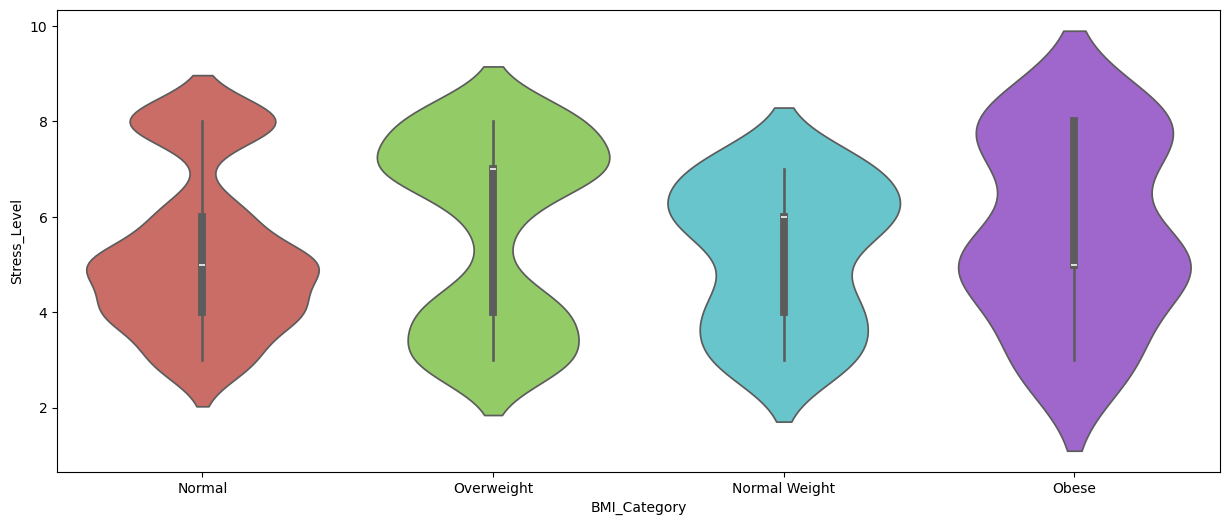

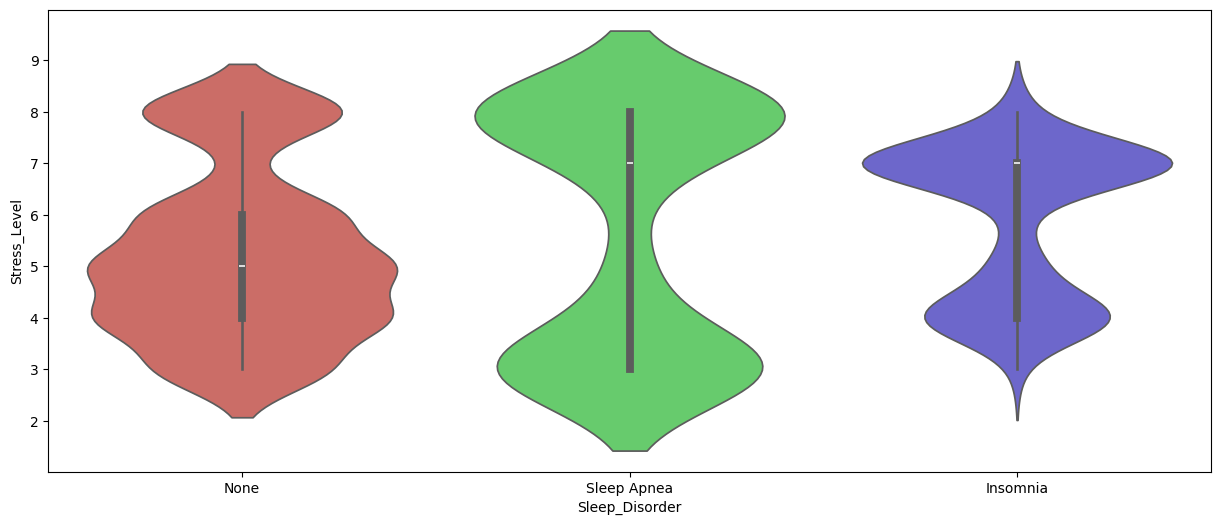

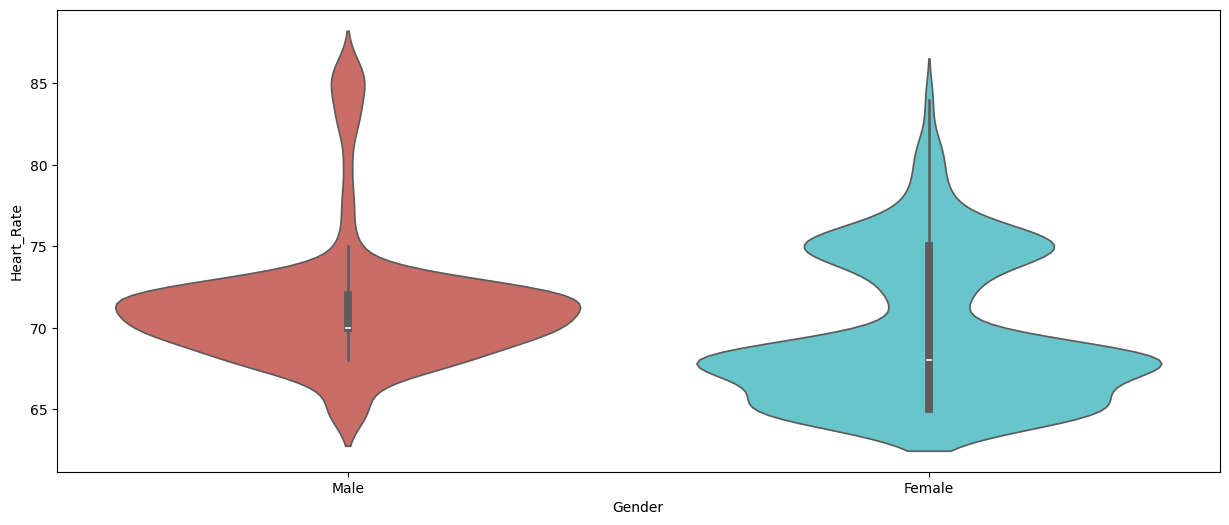

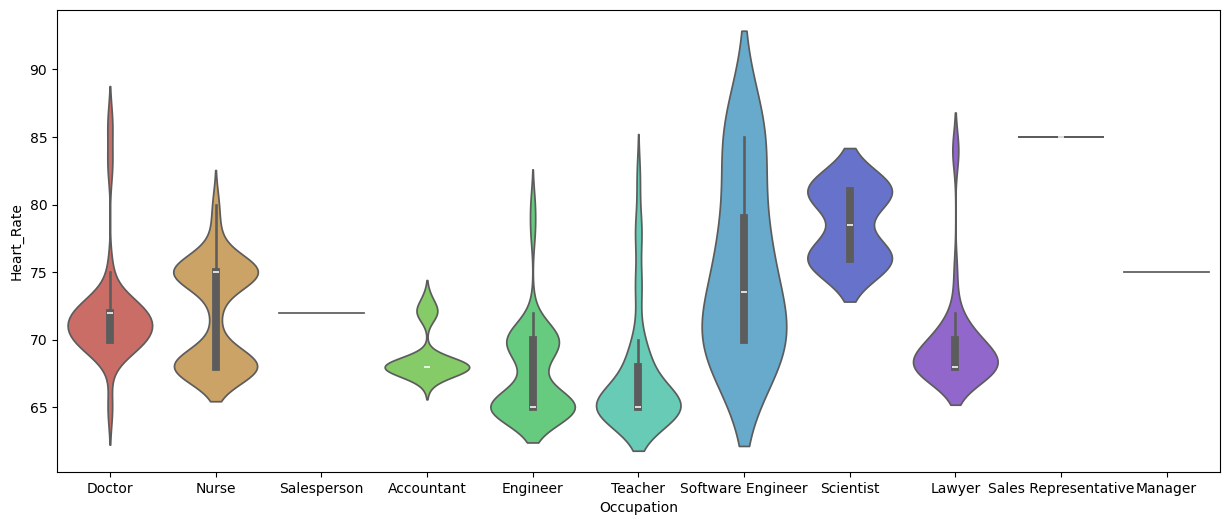

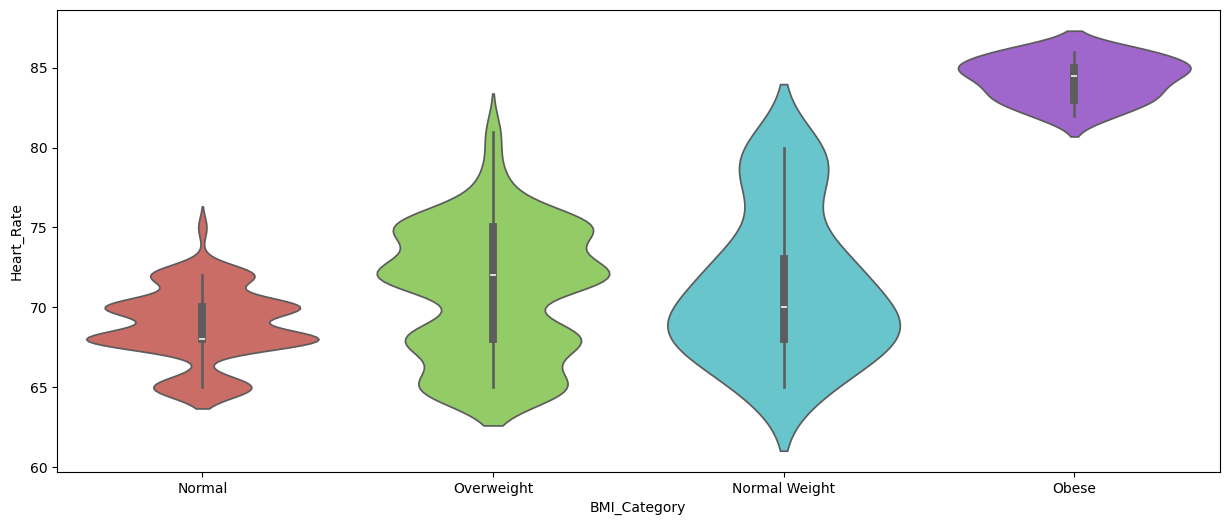

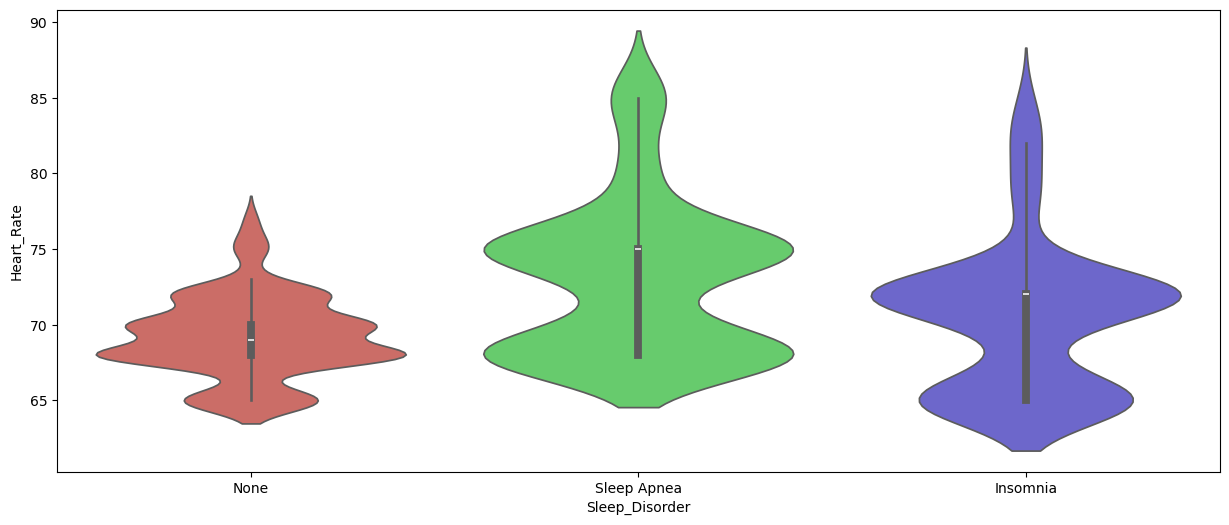

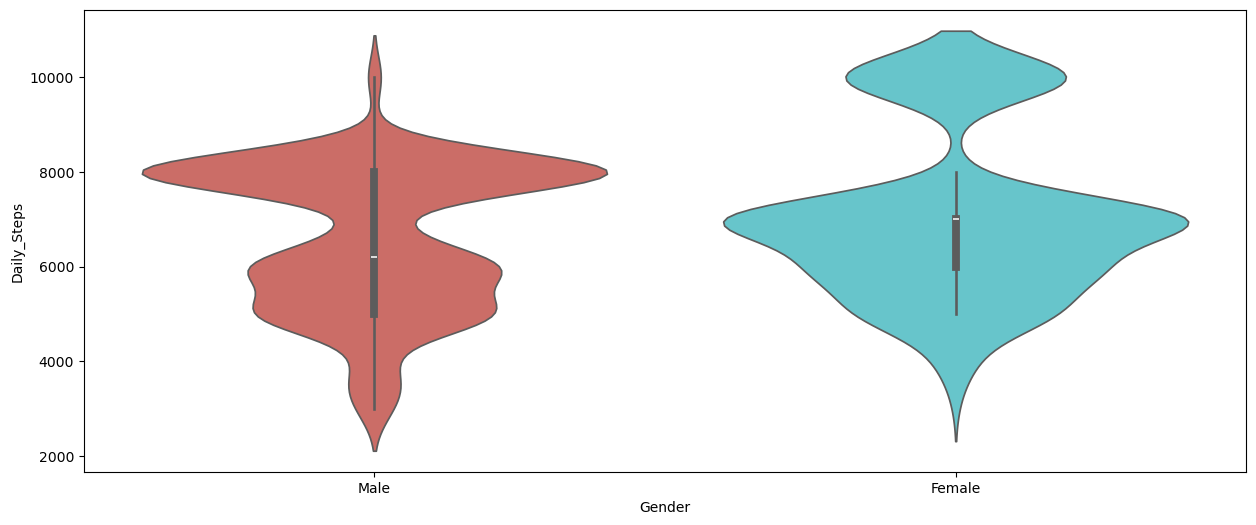

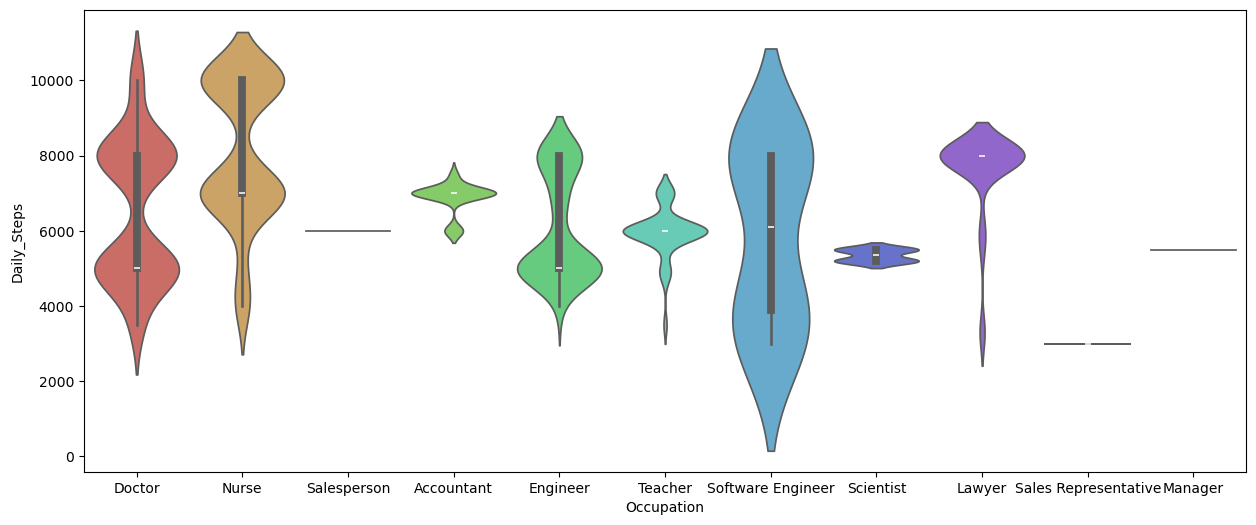

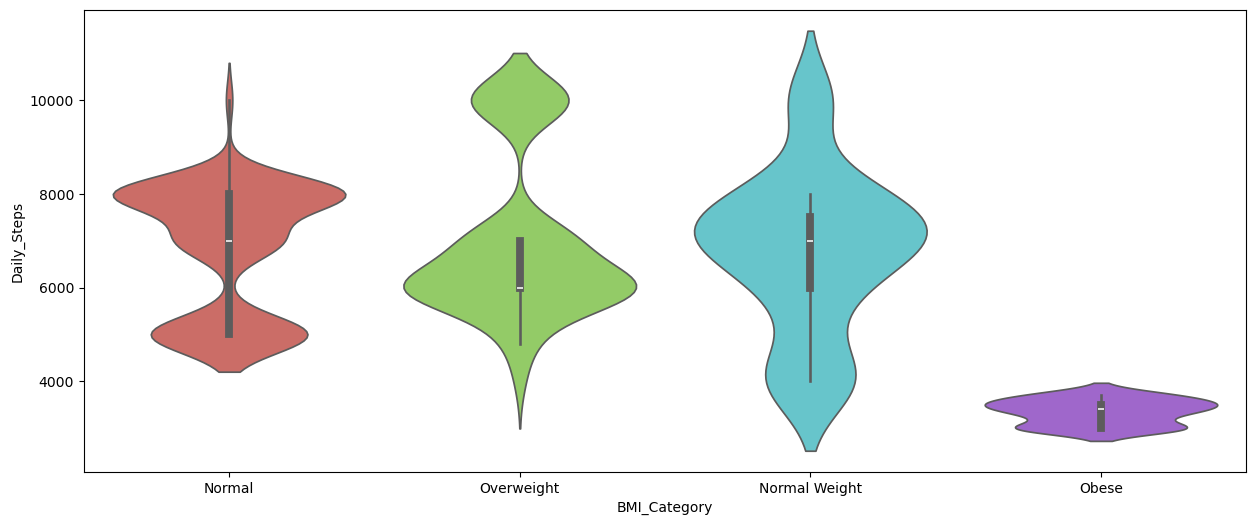

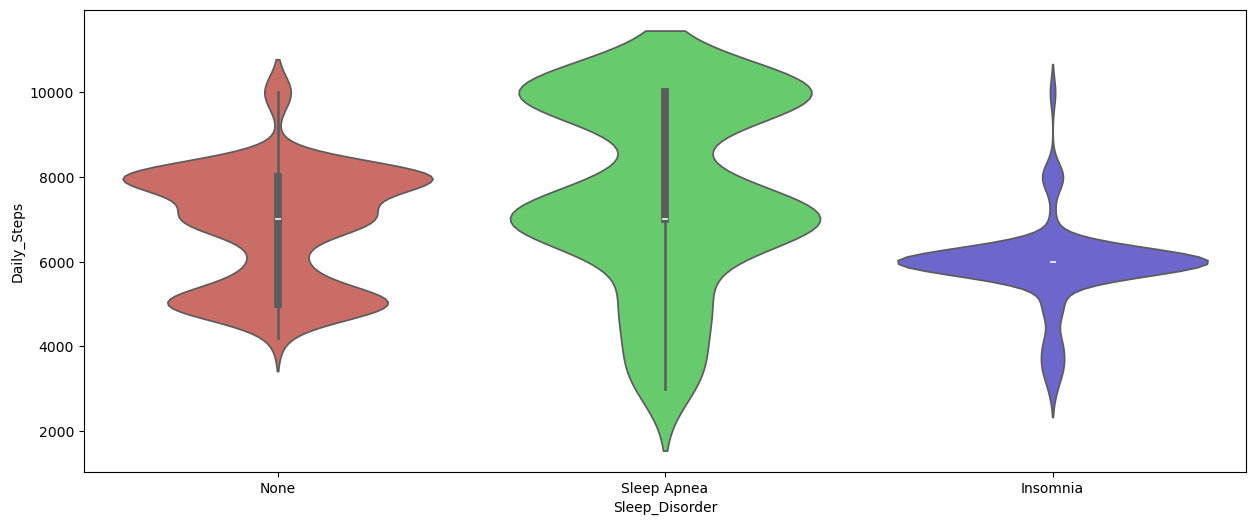

In [36]:
for i in numerical_columns:
    for j in object_columns:
        if i != 'Person_ID' and j != 'Blood_Pressure':
                plt.figure(figsize=(15,6))
                sns.violinplot(x = df[j], y = df[i], data = df, palette = 'hls')
                plt.show()

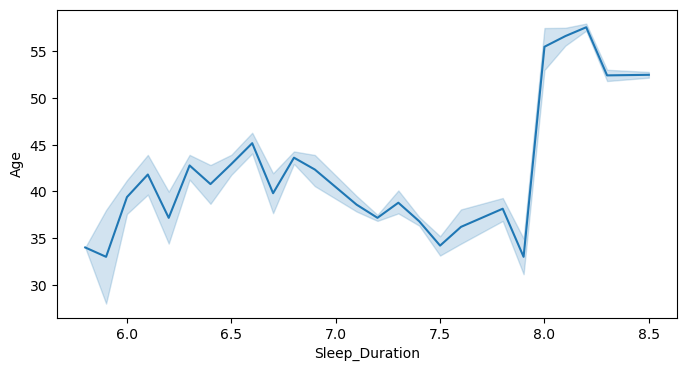

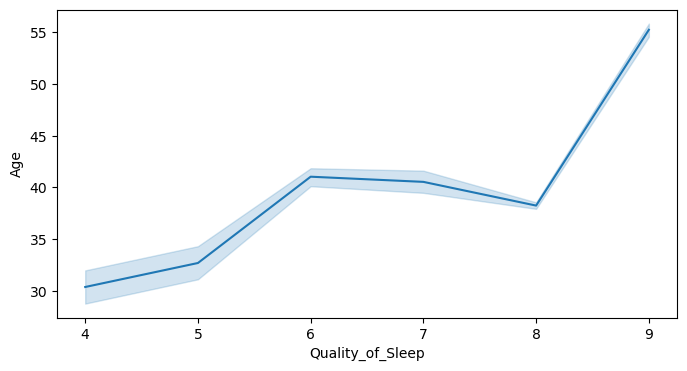

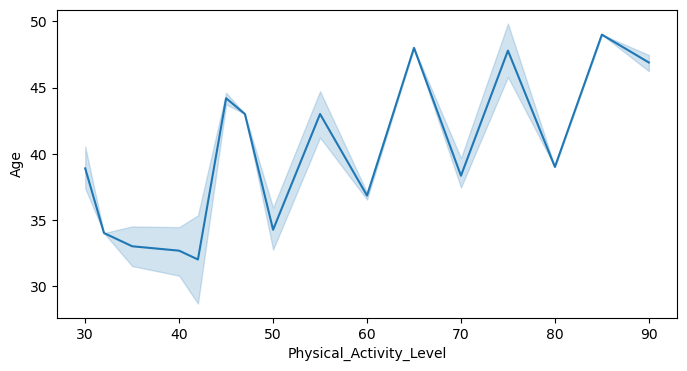

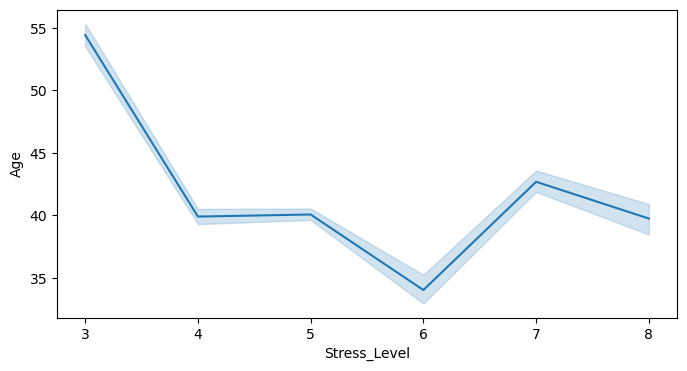

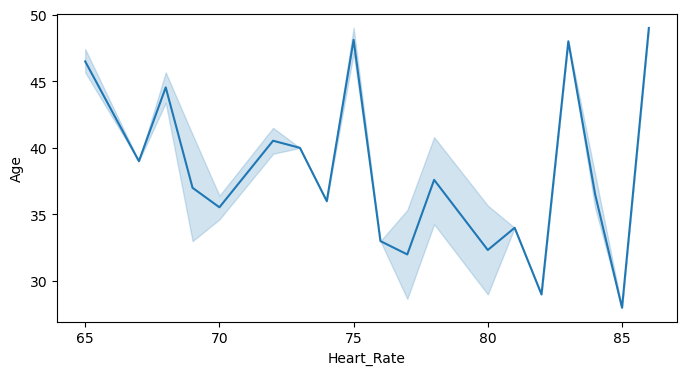

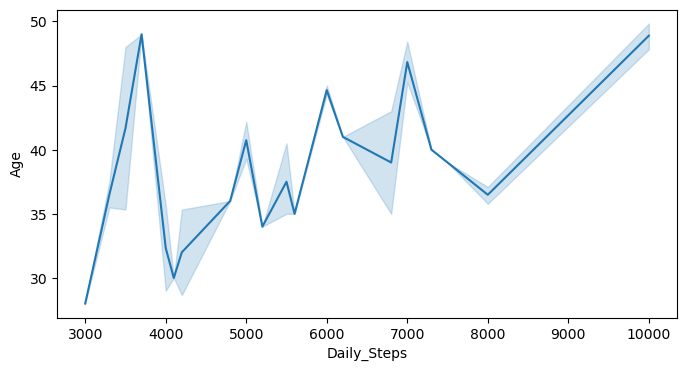

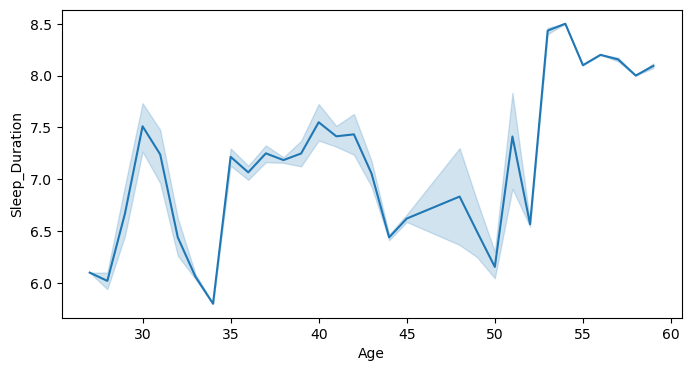

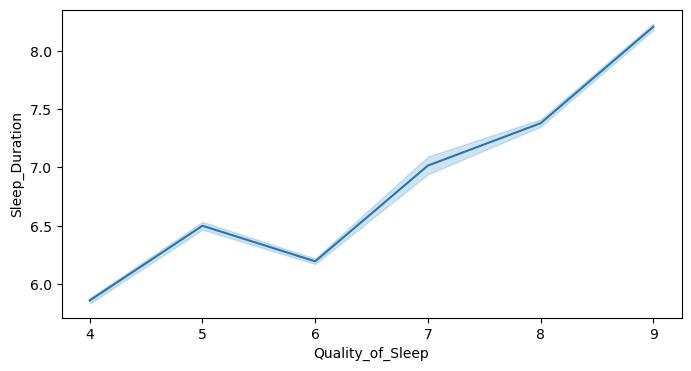

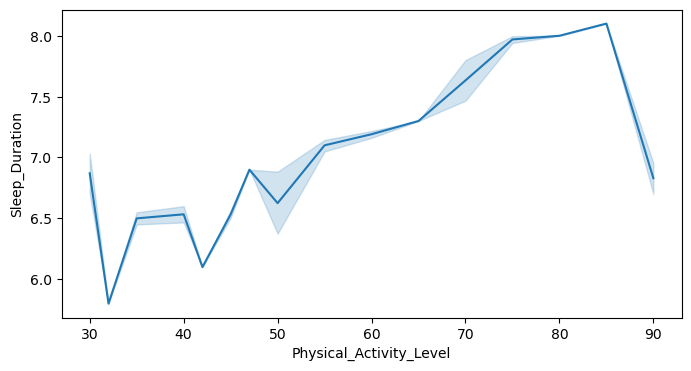

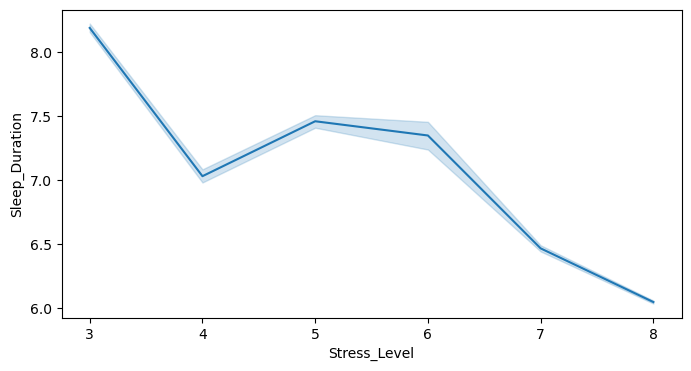

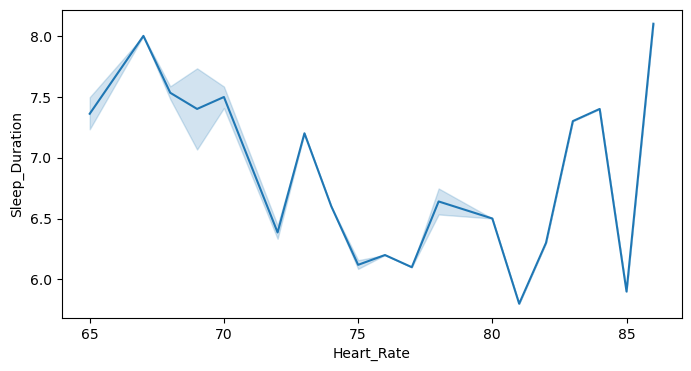

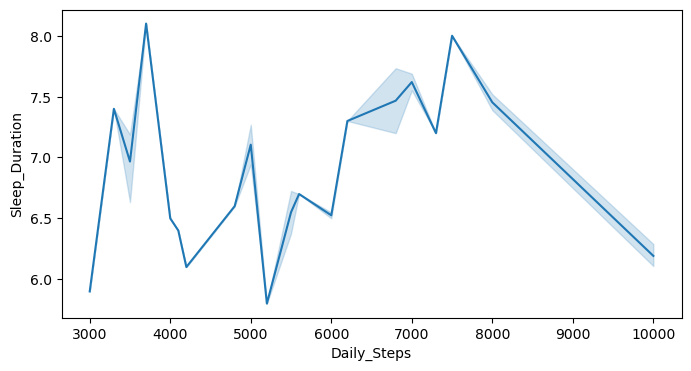

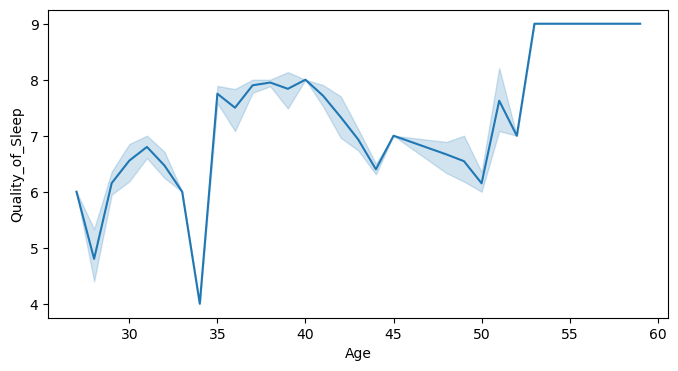

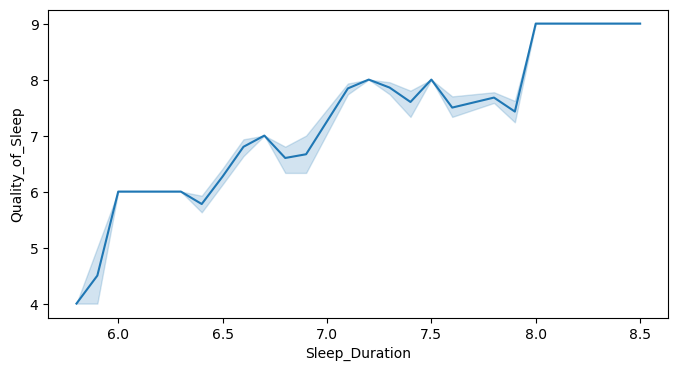

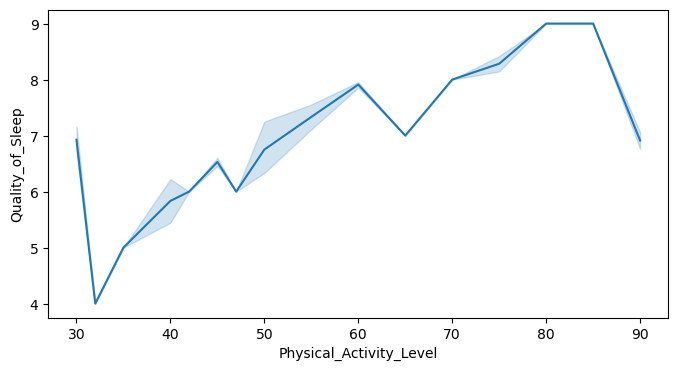

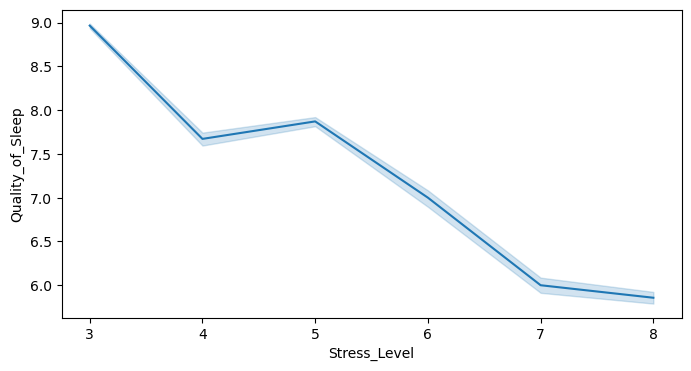

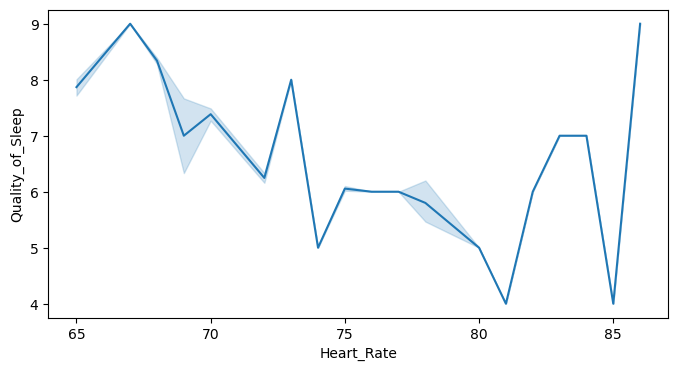

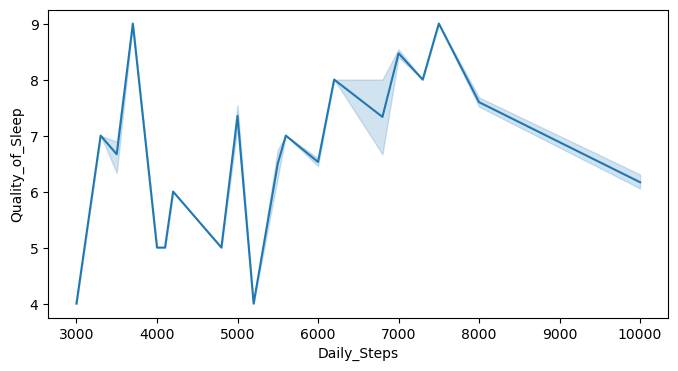

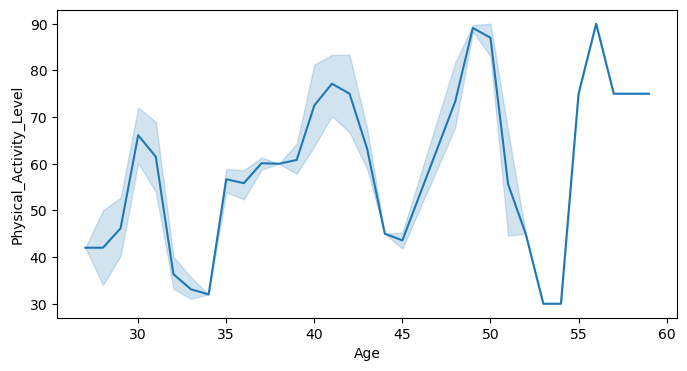

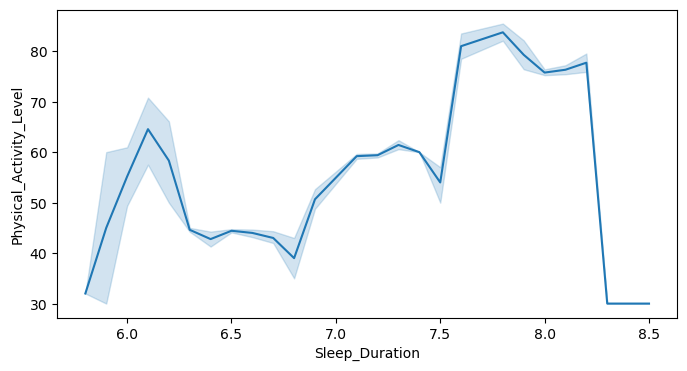

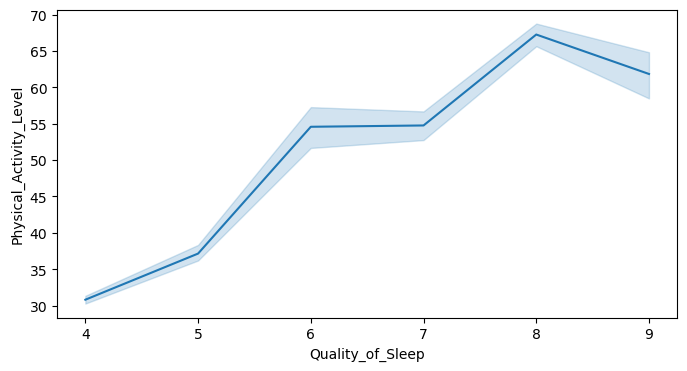

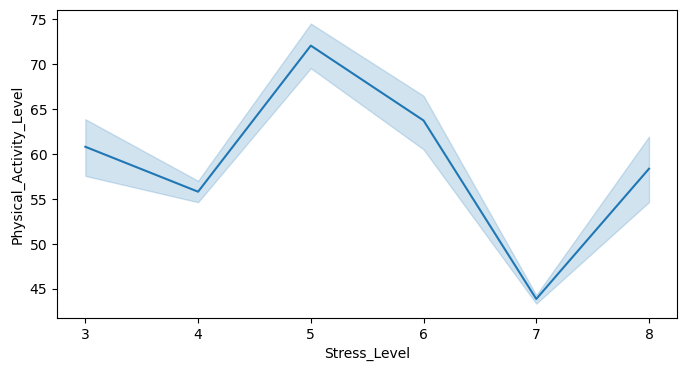

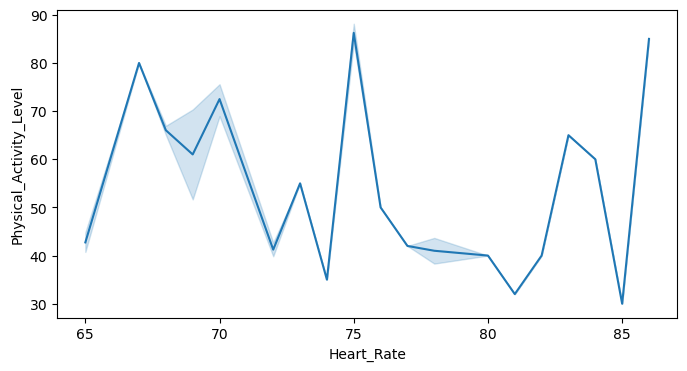

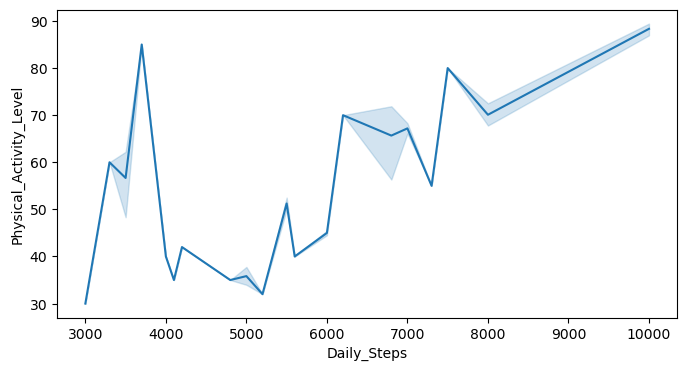

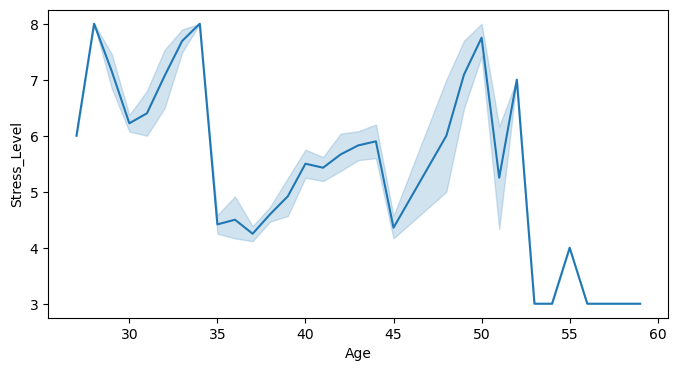

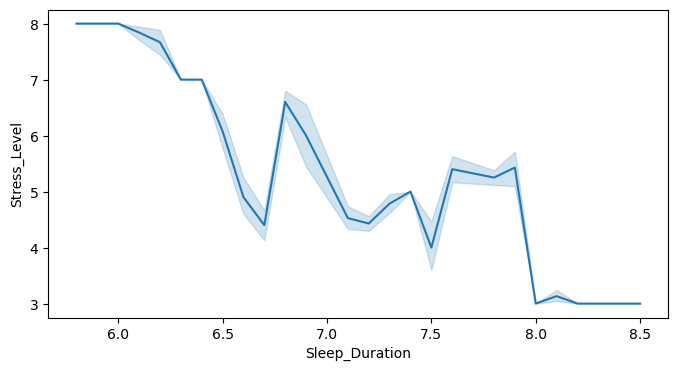

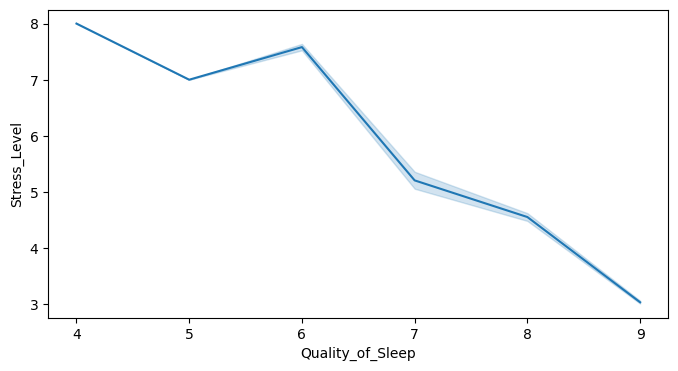

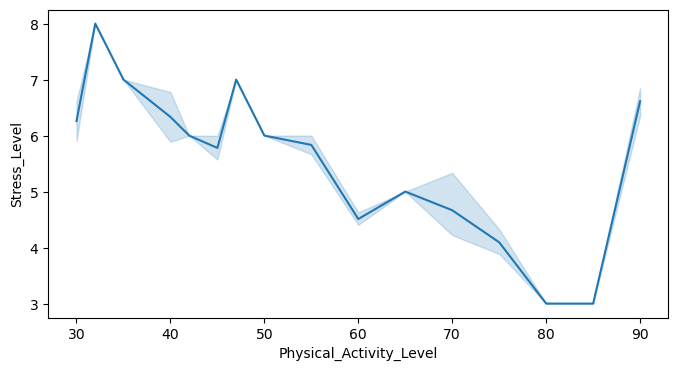

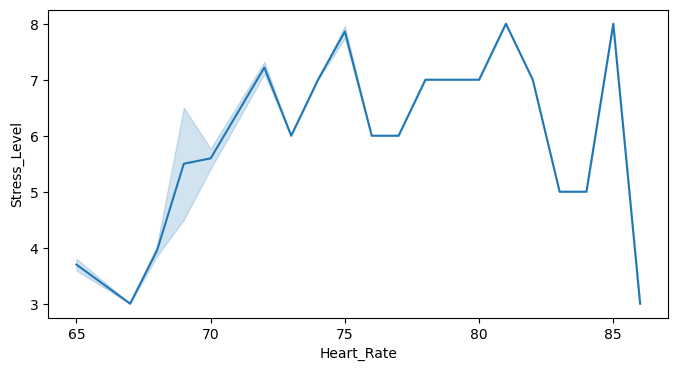

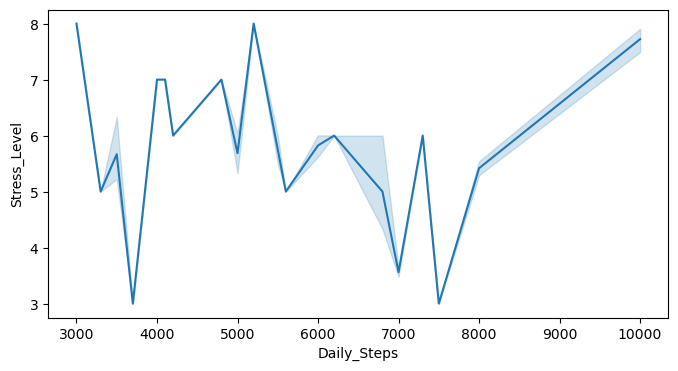

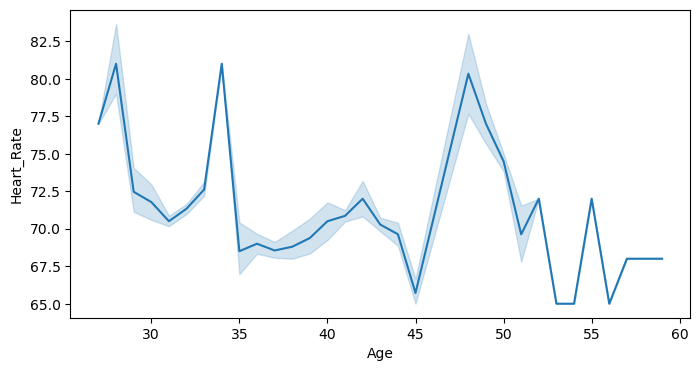

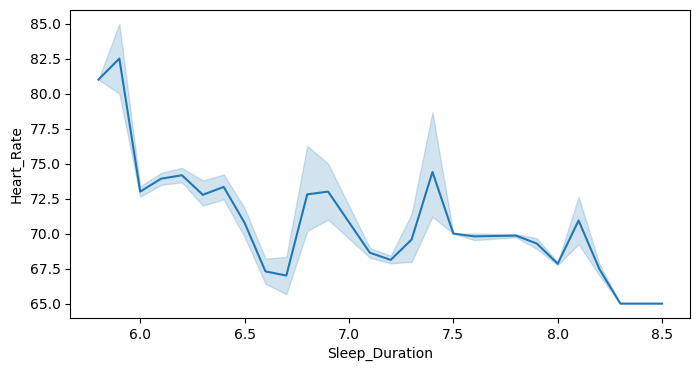

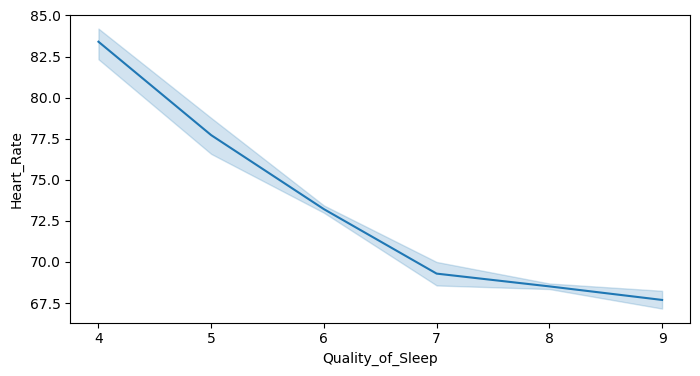

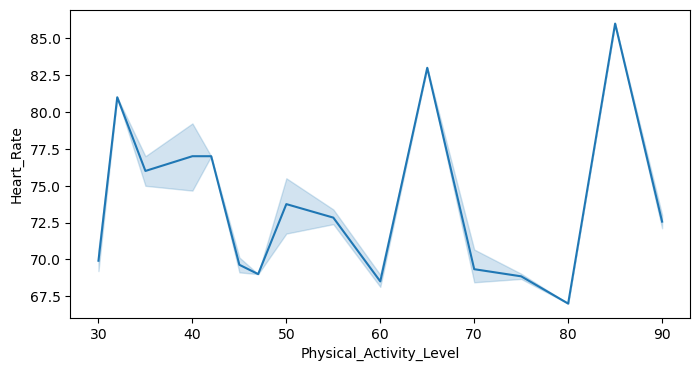

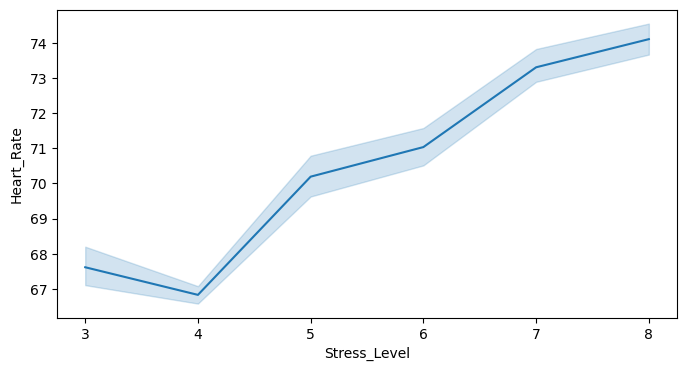

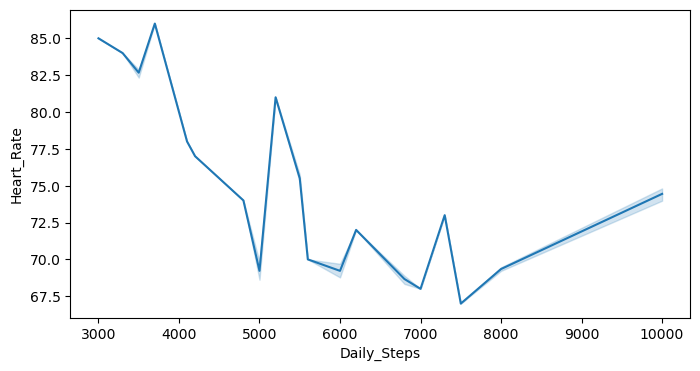

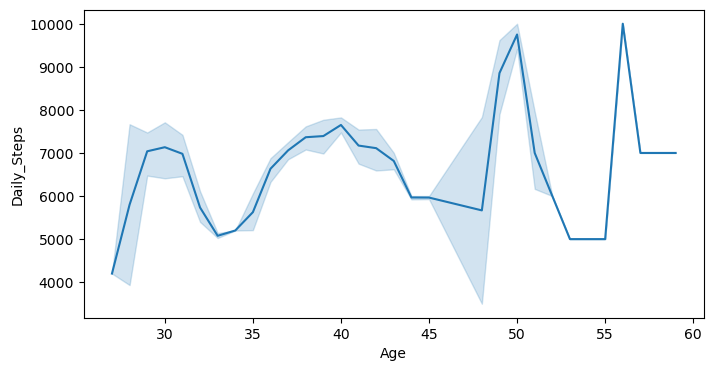

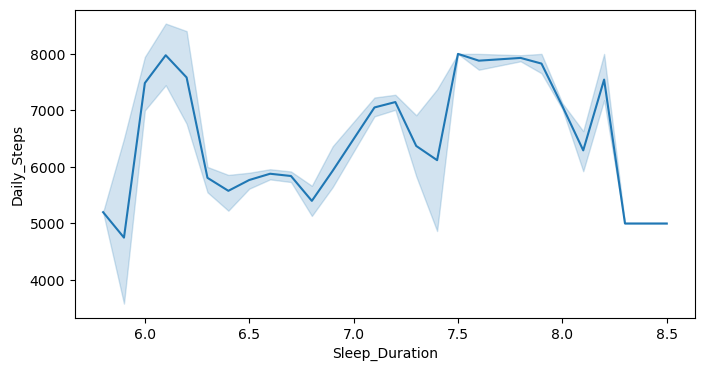

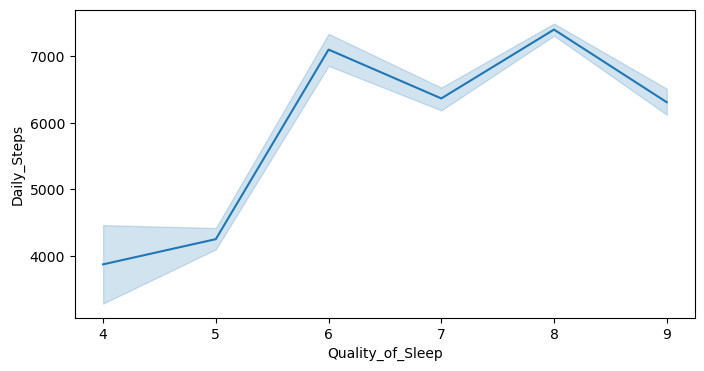

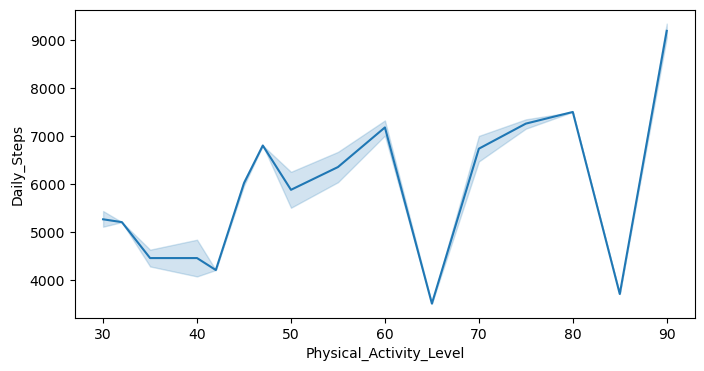

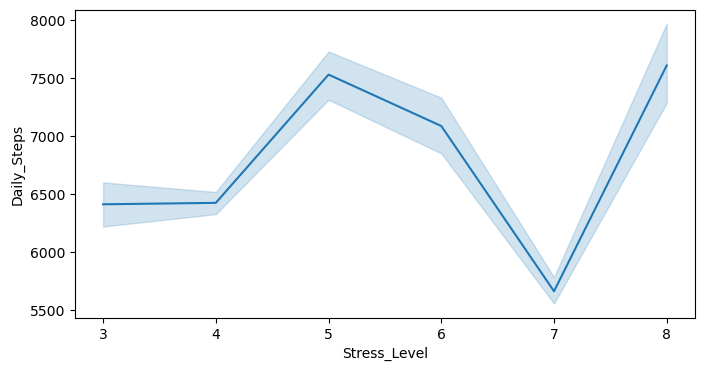

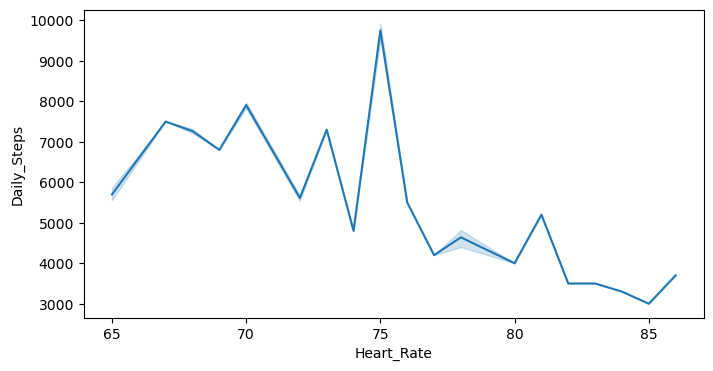

In [37]:
for i in numerical_columns:
    for j in numerical_columns:
        if i != 'Person_ID' and j != 'Person_ID':
            if i != j:
                plt.figure(figsize=(8,4))
                sns.lineplot(x = df[j], y = df[i], data = df, palette = 'hls')
                plt.show()

In [38]:
# IQR
# Calculate the upper and lower limits
Q1 = df['Heart_Rate'].quantile(0.25)
Q3 = df['Heart_Rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['Heart_Rate']>=upper)[0]
df = df.drop(index = upper_array)

In [39]:
df.columns

Index(['Person_ID', 'Gender', 'Age', 'Occupation', 'Sleep_Duration',
       'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level',
       'BMI_Category', 'Blood_Pressure', 'Heart_Rate', 'Daily_Steps',
       'Sleep_Disorder', 'Systolic', 'Diastolic'],
      dtype='object')

In [40]:
average_systolic = df['Systolic'].mean()
average_diastolic = df['Diastolic'].mean()
print(f"Average Systolic Pressure: {average_systolic}")
print(f"Average Diastolic Pressure: {average_diastolic}")

Average Systolic Pressure: 128.62446808510637
Average Diastolic Pressure: 84.83085106382978


In [41]:
# Create a copy of the DataFrame with only the selected columns
df_selected = df.copy()

In [42]:
df_selected = df_selected.drop(['Blood_Pressure',], axis = 1)

In [43]:
# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df_selected, columns=['Gender', 'Occupation', 'BMI_Category'], drop_first = True, dtype = int) 

In [44]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 940 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Person_ID                     940 non-null    Int64  
 1   Age                           940 non-null    Int64  
 2   Sleep_Duration                940 non-null    float64
 3   Quality_of_Sleep              940 non-null    Int64  
 4   Physical_Activity_Level       940 non-null    Int64  
 5   Stress_Level                  940 non-null    Int64  
 6   Heart_Rate                    940 non-null    Int64  
 7   Daily_Steps                   940 non-null    Int64  
 8   Sleep_Disorder                940 non-null    object 
 9   Systolic                      940 non-null    int64  
 10  Diastolic                     940 non-null    int64  
 11  Gender_Male                   940 non-null    int64  
 12  Occupation_Doctor             940 non-null    int64  
 13  Occupation

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded['Sleep_Disorder'] = label_encoder.fit_transform(df_encoded['Sleep_Disorder'])

In [46]:
df_encoded.columns

Index(['Person_ID', 'Age', 'Sleep_Duration', 'Quality_of_Sleep',
       'Physical_Activity_Level', 'Stress_Level', 'Heart_Rate', 'Daily_Steps',
       'Sleep_Disorder', 'Systolic', 'Diastolic', 'Gender_Male',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI_Category_Normal Weight',
       'BMI_Category_Overweight'],
      dtype='object')

In [47]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

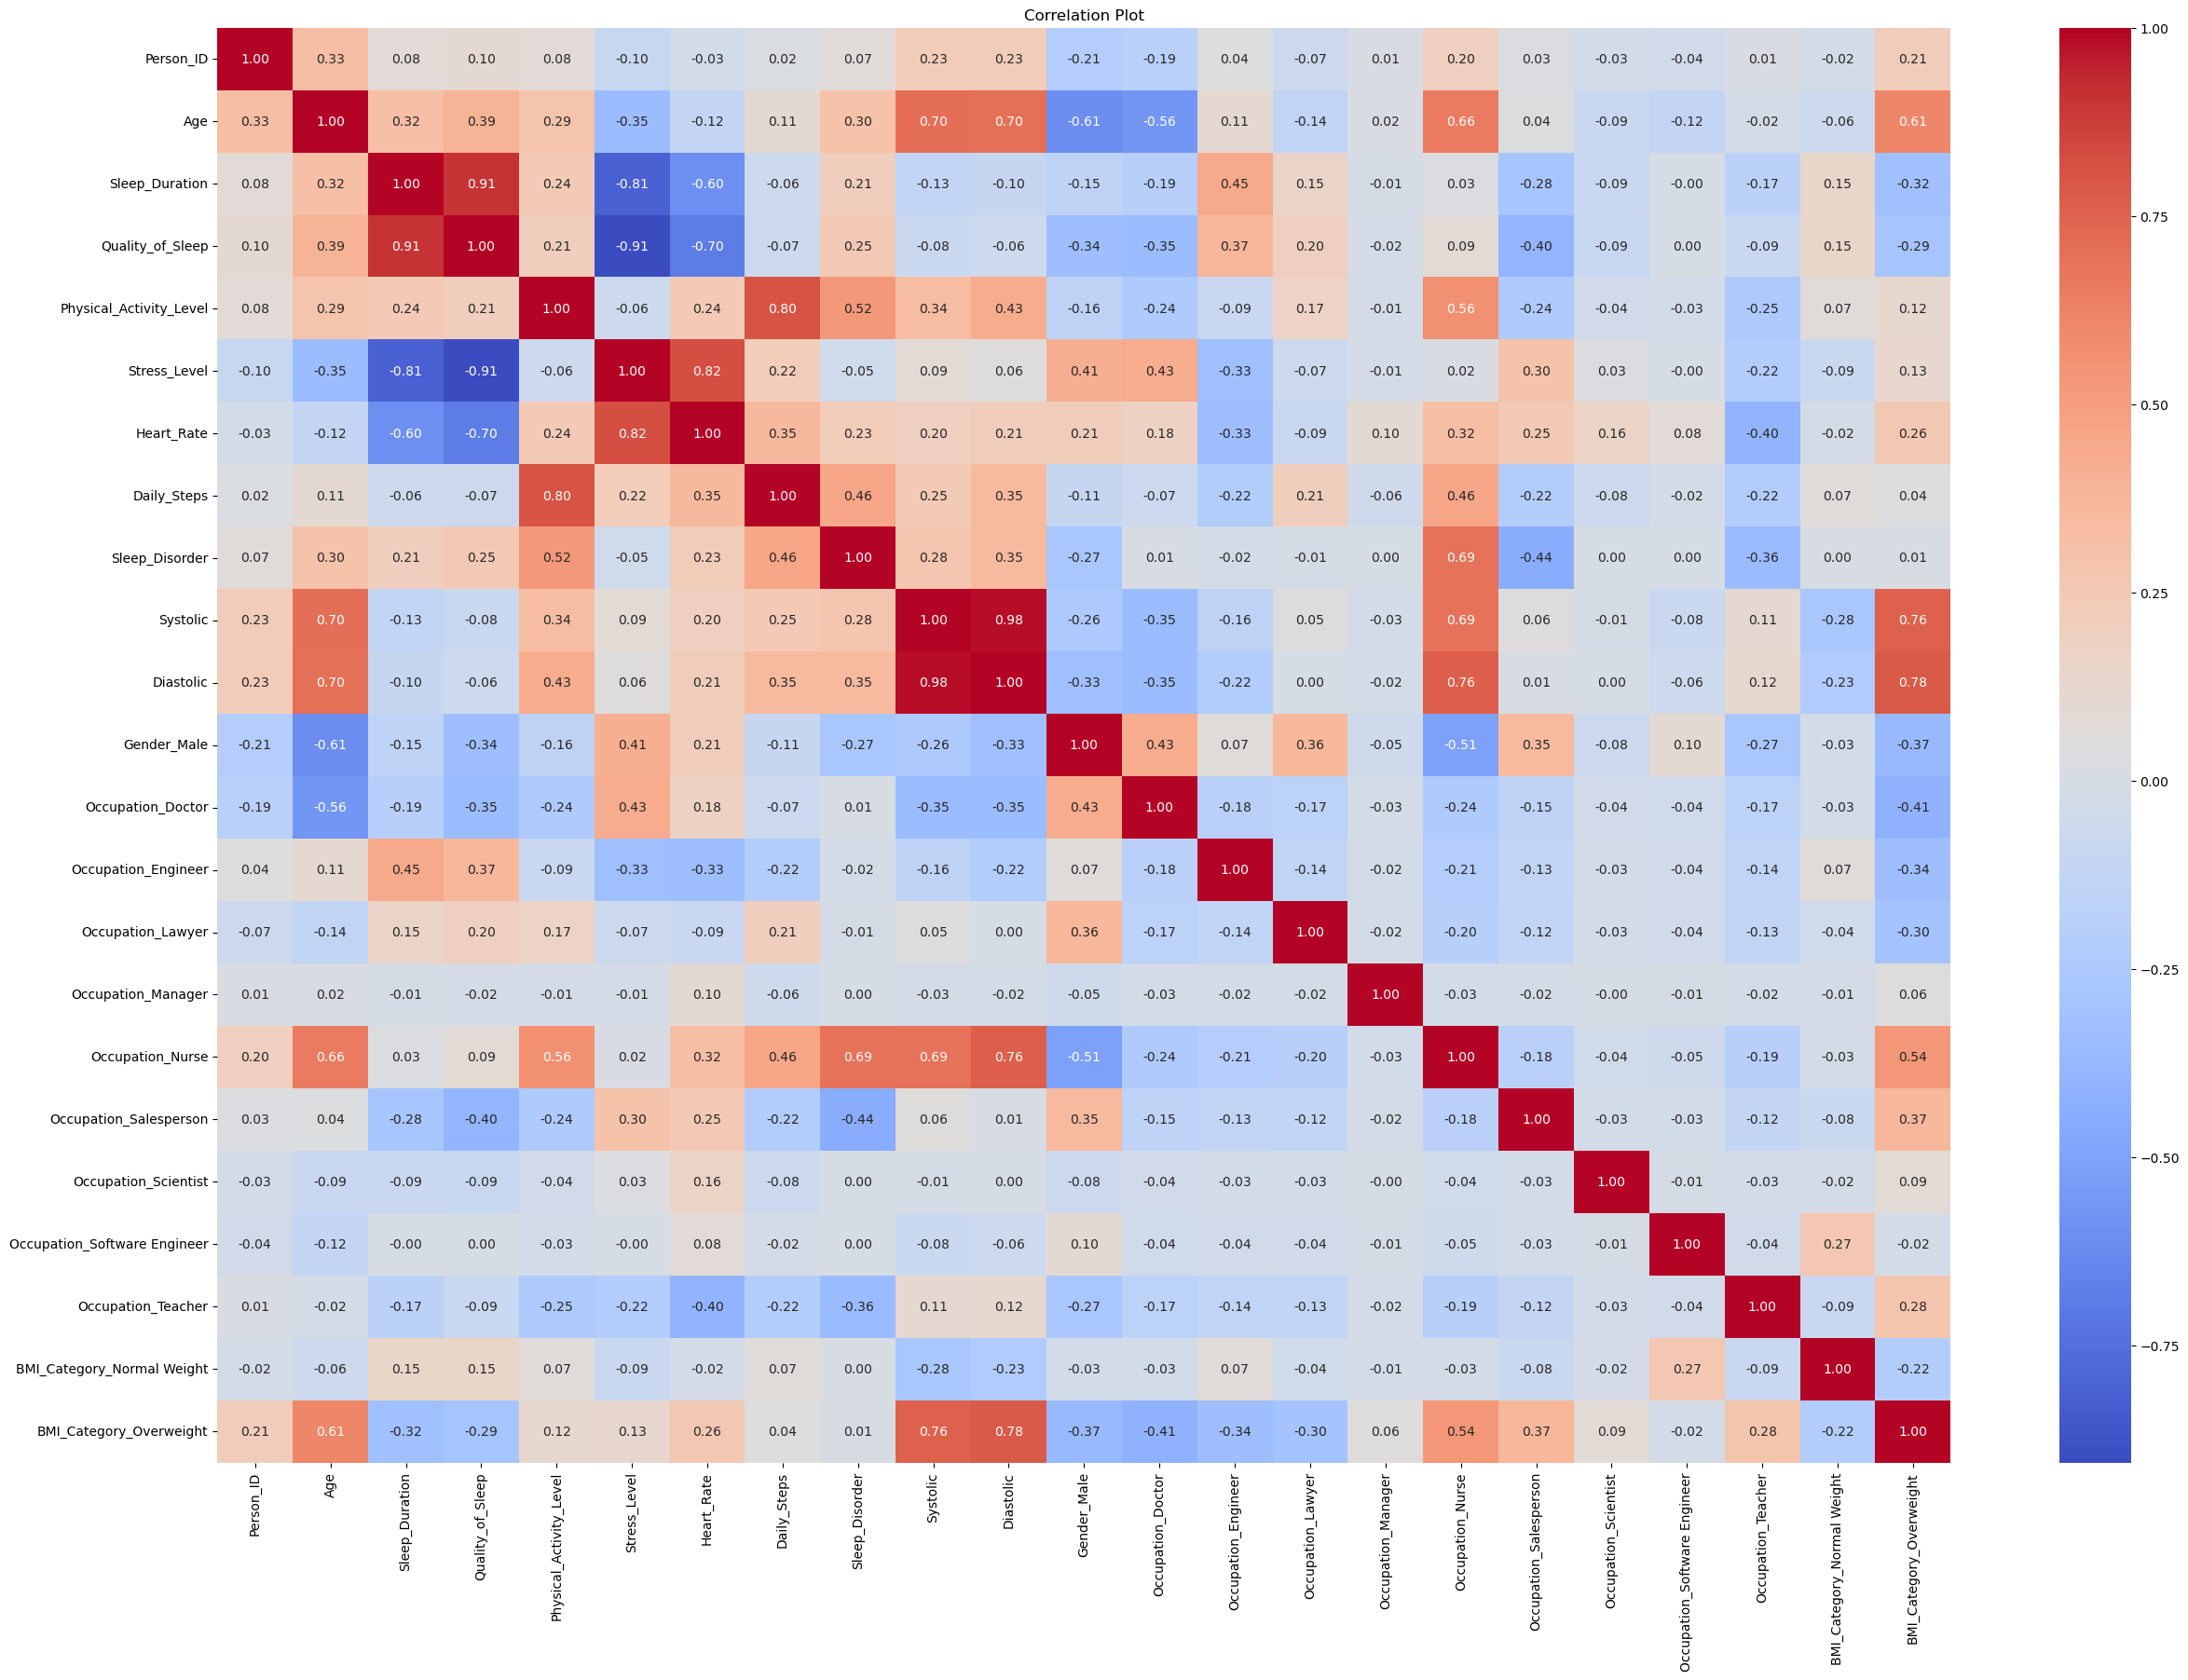

In [48]:
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X is the feature matrix and y is the target variable
X = df_encoded.drop('Sleep_Disorder', axis=1) # Drop the target variable from the featu
y = df_encoded['Sleep_Disorder']

# Create a random forest classifier
clf = RandomForestClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Get feature importance scores
feature_importance = clf.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance scores
print(feature_importance_df)

                         Feature  Importance
0                      Person_ID    0.182740
8                       Systolic    0.155290
21       BMI_Category_Overweight    0.133144
1                            Age    0.118116
9                      Diastolic    0.091098
2                 Sleep_Duration    0.065733
4        Physical_Activity_Level    0.051761
15              Occupation_Nurse    0.047618
7                    Daily_Steps    0.029684
16        Occupation_Salesperson    0.029192
6                     Heart_Rate    0.024498
3               Quality_of_Sleep    0.022249
5                   Stress_Level    0.013812
19            Occupation_Teacher    0.009422
12           Occupation_Engineer    0.008517
10                   Gender_Male    0.007676
11             Occupation_Doctor    0.004486
13             Occupation_Lawyer    0.002060
20    BMI_Category_Normal Weight    0.001812
17          Occupation_Scientist    0.000580
18  Occupation_Software Engineer    0.000285
14        

# Modelling

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [51]:
#df = pg.read_gbq('SELECT * FROM `baidao-test-666808.sleep_dataset.Sleep_health_and_lifestyle_dataset-2` LIMIT 100',
#                  project_id='baidao-test-666808')

In [52]:
#df = df.drop('Person_ID', axis = 1)

In [53]:
#hot = pd.get_dummies(df[['Gender', 'Occupation', 'BMI_Category', 'Blood_Pressure']])
#df = pd.concat([df, hot], axis = 1)
#df = df.drop(['Gender', 'Occupation', 'BMI_Category', 'Blood_Pressure'], axis = 1)

In [54]:
#X = df.drop('Sleep_Disorder', axis = 1)
#X = X.values
#y = df['Sleep_Disorder']

In [55]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_standard = scaler.fit_transform(X)

In [56]:
#from sklearn.model_selection import train_test_split
#X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)
#print("训练集特征：")
#print(X_train)

In [57]:
# 数据划分
#X = df.drop('Sleep_Disorder', axis=1)
#y = df['Sleep_Disorder']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
logreg = LogisticRegression()

In [60]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred = logreg.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7287234042553191


In [63]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.44      0.51        39
           1       0.79      0.74      0.76       105
           2       0.69      0.95      0.80        44

    accuracy                           0.73       188
   macro avg       0.69      0.71      0.69       188
weighted avg       0.73      0.73      0.72       188



In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier()

In [66]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
y_pred = dt.predict(X_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9202127659574468


In [69]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.92      0.97      0.94       105
           2       0.93      0.86      0.89        44

    accuracy                           0.92       188
   macro avg       0.92      0.89      0.91       188
weighted avg       0.92      0.92      0.92       188



In [70]:
import xgboost as xgb

In [71]:
xgb_model = xgb.XGBClassifier()

In [72]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [73]:
y_pred = xgb_model.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9202127659574468


In [75]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.95      0.95      0.95       105
           2       0.85      0.93      0.89        44

    accuracy                           0.92       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.92      0.92      0.92       188



In [76]:
import os
import pickle

from google.cloud import storage
from sklearn import datasets
import xgboost as xgb

digits = datasets.load_digits()
dtrain = xgb.DMatrix(digits.data, label=digits.target)
bst = xgb.train({}, dtrain, 20)

artifact_filename = 'model.pkl'

# Save model artifact to local filesystem (doesn't persist)
local_path = artifact_filename
with open(local_path, 'wb') as model_file:
  pickle.dump(bst, model_file)